# Introduction

This notebook will take you through some of the foundational elements of the Time Series analysis, Including various types of dataset's and how does Time Series Data differ from them, Inferrential Statistics pertaining to the Time Series data, Various graphical visualisation involved in the time series.

<b>Interesting Read : </b>[Engineering Statistics Handbook](https://www.itl.nist.gov/div898/handbook/index.htm)

<img src='../Materials/Engineering Statistic Handbook - Cover.png' width='250' align='left'>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

[R - Libraries : Some useful libraries and components for Time Series Analysis in R - by Rob.J.Hyndman](https://cran.r-project.org/web/views/TimeSeries.html)

# Imports

In [1]:
# General
from warnings import filterwarnings
filterwarnings('ignore')
from cycler import cycler


# Data Wrangling
import pandas as pd
import numpy as np

# Data Viualization
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl

# Time Series Specific
from statsmodels.tsa.seasonal import seasonal_decompose


# Datetime
from datetime import datetime

# Data
from datahandler import dataHolder

# Path and Variable Initialisation

In [68]:
root_path = '../'
raw_datapath = root_path+'Raw Data/'
prepared_datapath = root_path+'Prepared Data/'

In [67]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (15,7)
plt.style.use('dark_background')

# Load & Explore the Data

In [2]:
dataHolder.load_data()

In [4]:
print('Available Datasets')
dataHolder.dataDf

Available Datasets


Handle         Short Description
0           airp_data            Air Passengers
1          mprod_data           Milk Production
2          brit_stock     Britannia Stock Price
3           india_cpi                 India CPI
4           beer_prod           Beer Production
5         house_price            Housing Prices
6   airp_data_missing  Air Passengers - Missing
7     housing_missing    Housing Data - Missing
8            pop_ener       Population & Energy
9             usa_cpi                   USA-CPI
10      anti_diabetic    AntiDiabetic Drug Sale
11       aus_elecprod    Electricity Production
12        visitor_20r    Visitors to 20 Regions

## Air Passengers Data

In [10]:
k='airp_data'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Air Passengers (Monthly), Numbers in 1000's, from 1949 to 1960


Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

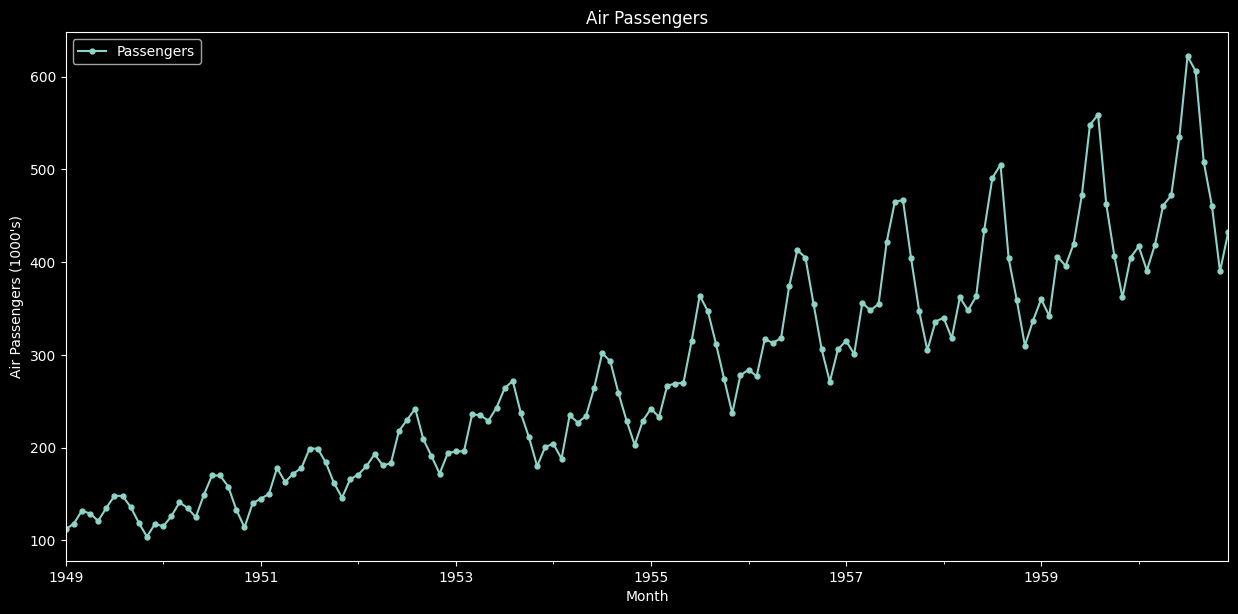

In [11]:
dataHolder.bucket[k].exploratory_plot()

## Milk Production Data

In [12]:
k='mprod_data'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Milk production (Monthly), Numbers in pounds per cow, from 1962 to 1975


MilkProduction
Month                     
1962-01-01             589
1962-02-01             561
1962-03-01             640
1962-04-01             656
1962-05-01             727

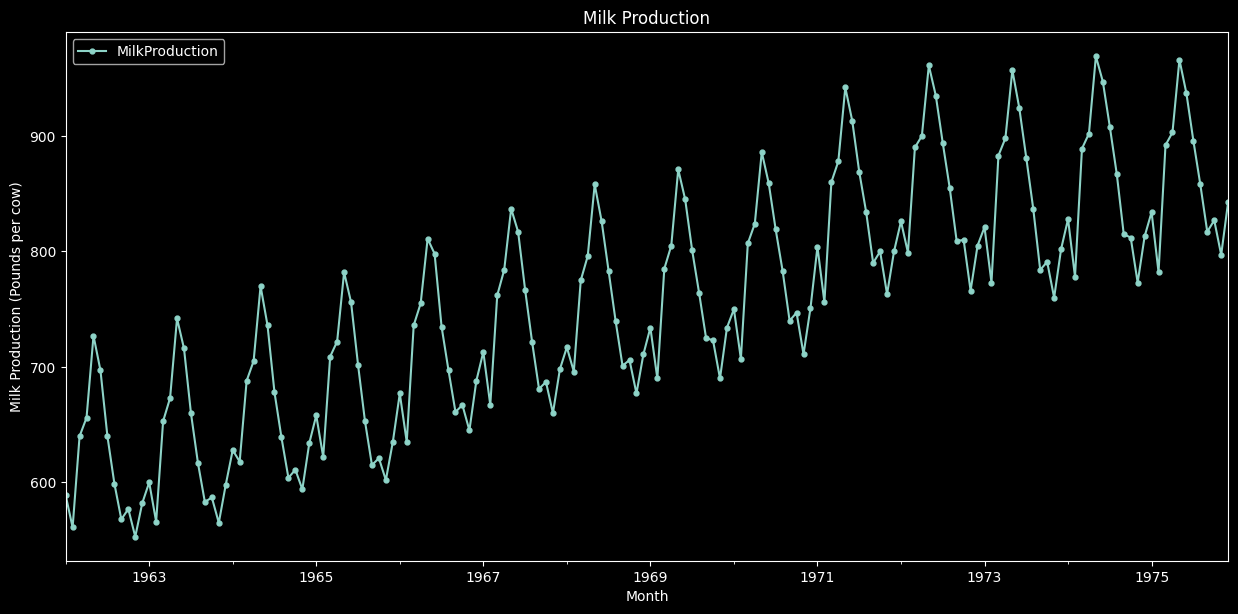

In [13]:
dataHolder.bucket[k].exploratory_plot()

## Britannia Stock Price Data

In [14]:
k='brit_stock'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Britannia's Stock Data (Buisness Daily), including Open, High, Low, Close & Volume of the Ticker, from 1996 to 2020


Open     High      Low    Close  Volume
Date                                                  
1996-01-02  10.6000  10.6000  10.6000  10.6000  1500.0
1996-01-03  10.6667  10.6667  10.4667  10.4667  3000.0
1996-01-05  10.6667  10.6667  10.4667  10.4733  6000.0
1996-01-08  10.3333  10.5333  10.3333  10.5333  3000.0
1996-01-10  10.0667  10.0667  10.0667  10.0667  1500.0

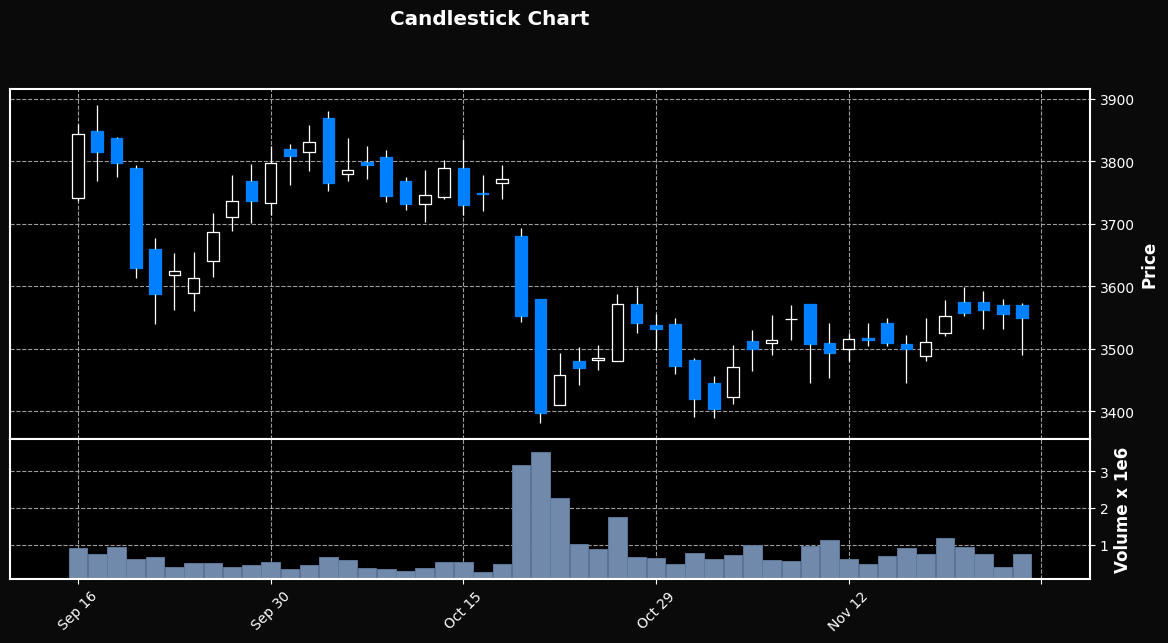

In [15]:
dataHolder.bucket[k].exploratory_plot()

## India CPI Data

In [16]:
k='india_cpi'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

India's Consumer Price index Data (Monthly), with groups and subgroups starting from 2013 to 2020


State           Description  Rural  Urban  Combined       Date
0       ALL India  Cereals and products  107.5  110.5     108.4 2013-01-01
1  Andhra Pradesh  Cereals and products  111.0  115.0     112.2 2013-01-01
2           Assam  Cereals and products  103.9  105.6     104.1 2013-01-01
3           Bihar  Cereals and products  107.3  110.2     107.6 2013-01-01
4    Chhattisgarh  Cereals and products  103.2  109.3     104.9 2013-01-01

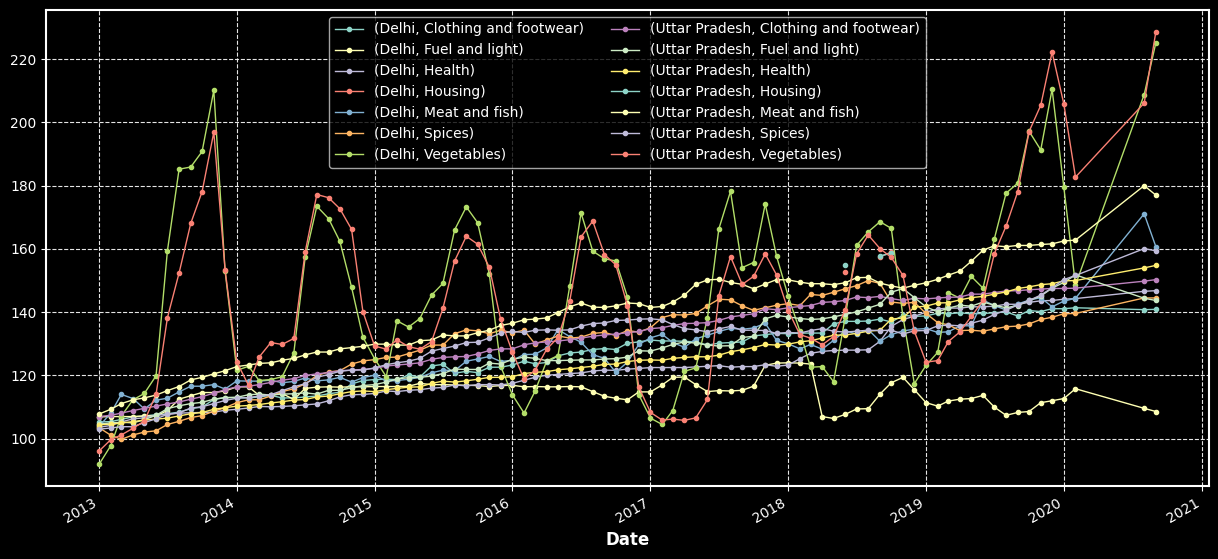

In [17]:
dataHolder.bucket[k].exploratory_plot()

## Beer Production Data

In [18]:
k='beer_prod'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Australlian Beer Production (Monthly), from , Numbers in Million Barrels, from 1956 to 1995


MBP
Month           
1956-01-01  93.2
1956-02-01  96.0
1956-03-01  95.2
1956-04-01  77.1
1956-05-01  70.9

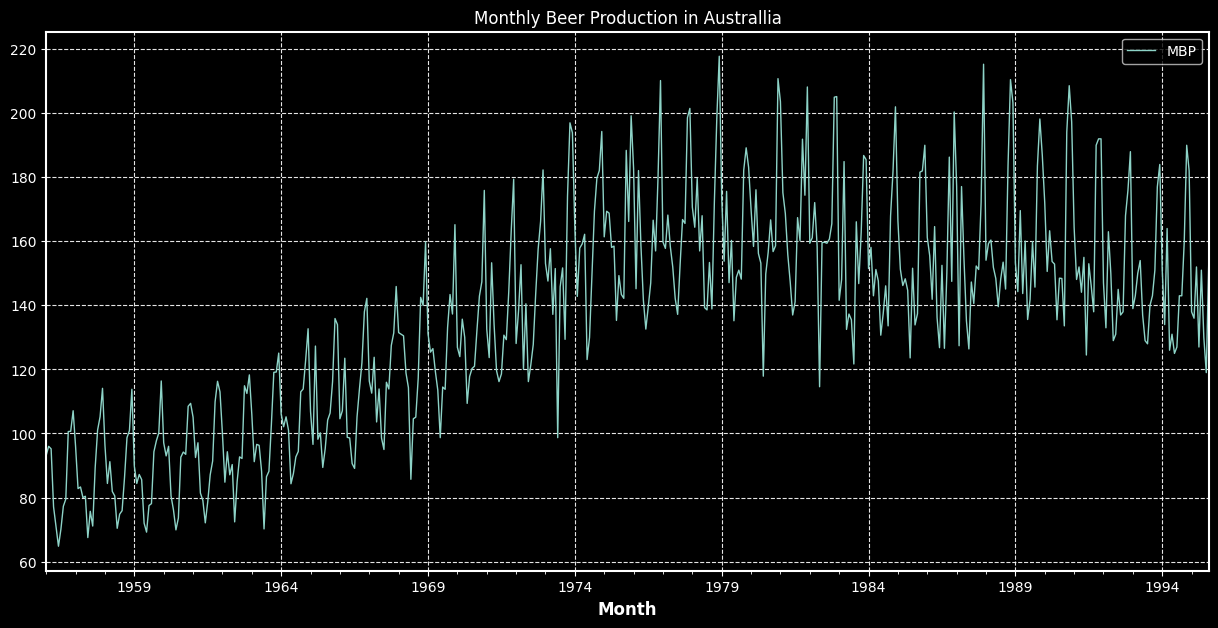

In [19]:
dataHolder.bucket[k].exploratory_plot()

## Housing Prices Data

In [20]:
k='house_price'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

USA Housing Prices Data (Monthly), prices in $, from 2008 to 2020


Region     Price
Month                           
2008-03-01     Chicago  325100.0
2008-03-01   Las Vegas  244400.0
2008-03-01      Dallas  148400.0
2008-03-01    Columbus  116000.0
2008-03-01  Louisville  124800.0

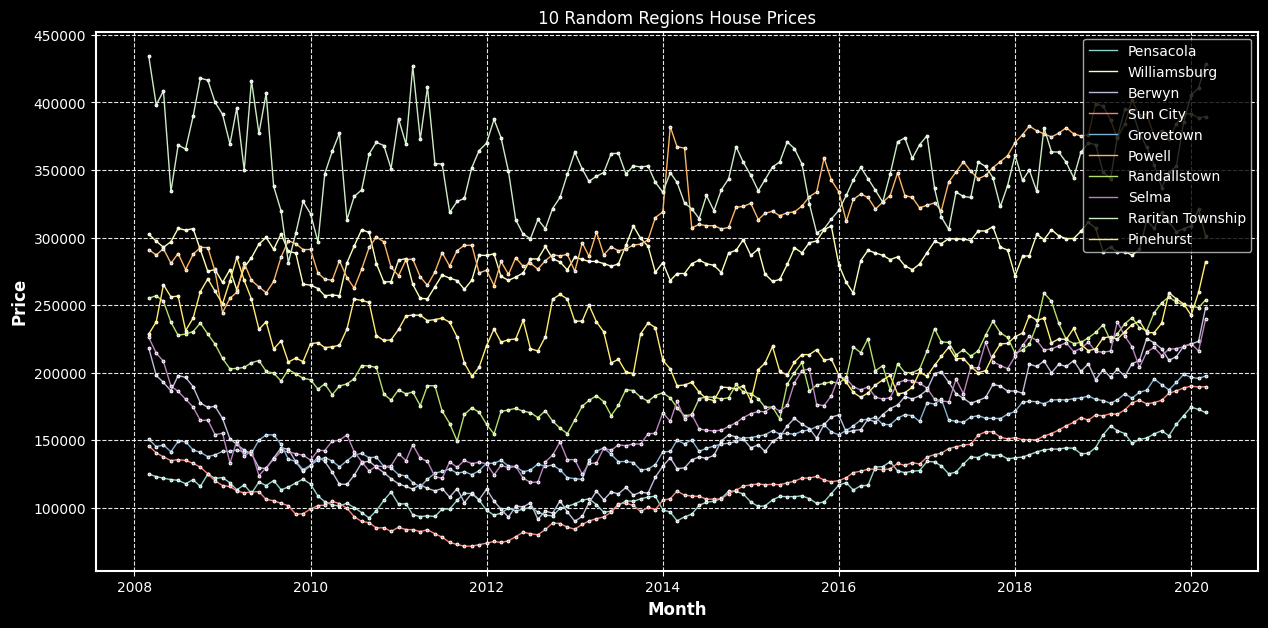

In [21]:
dataHolder.bucket[k].exploratory_plot()

## Air Passengers Missing Data

In [22]:
k='airp_data_missing'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Air Passengers (Monthly) with Missing Values, Numbers in 1000's, from 1949 to 1960


Passengers
Date                  
1949-01-01       112.0
1949-02-01       118.0
1949-03-01       132.0
1949-04-01       129.0
1949-05-01         NaN

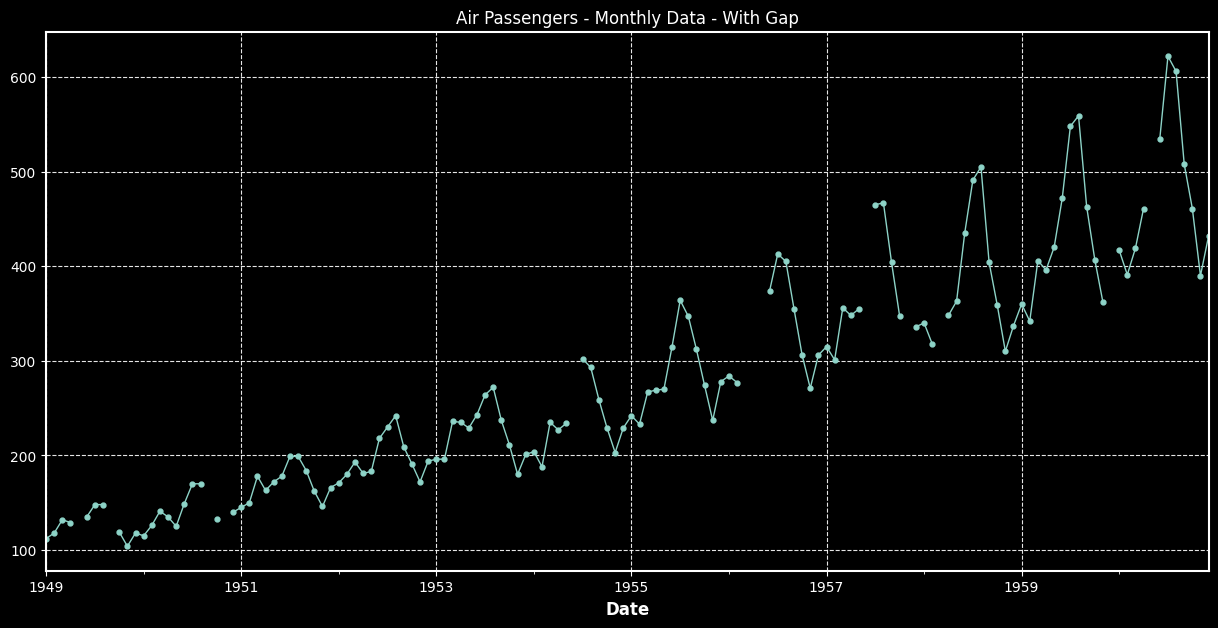

In [23]:
dataHolder.bucket[k].exploratory_plot()

## Housing Missing Data

In [24]:
k='housing_missing'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Housing Data with Missing Values


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  1.0  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  2.0  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  2.0  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  3.0  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  3.0  222     18.7   

        b  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2

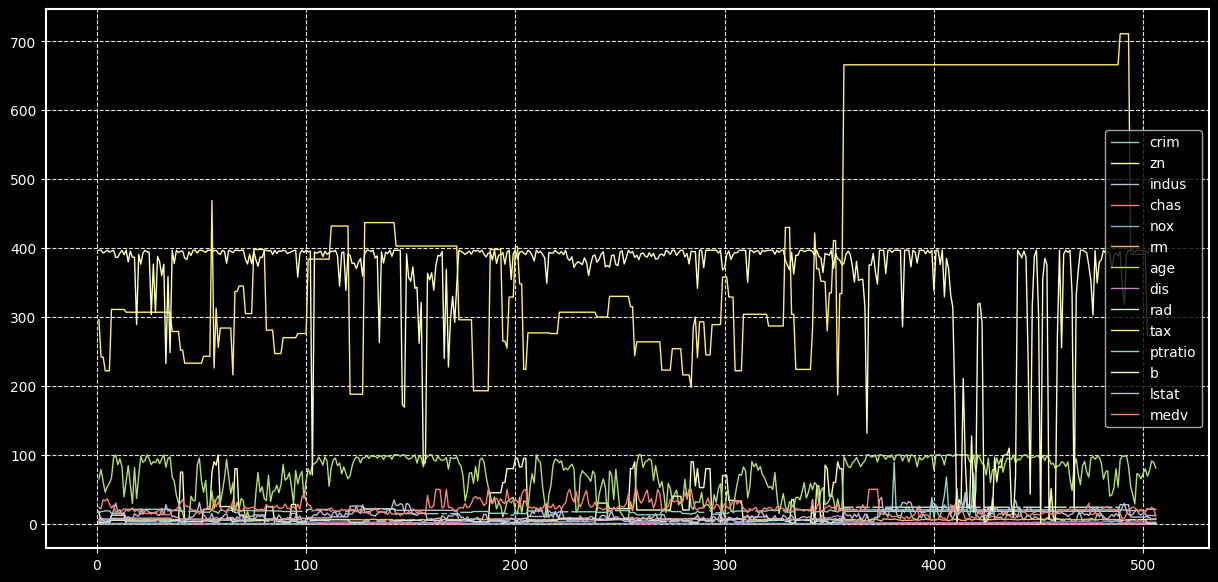

In [25]:
dataHolder.bucket[k].exploratory_plot()

## Global Population & Energy Data

In [26]:
k='pop_ener'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Global Population and Energy Consumption across various segments (Yearly), Enegry in kWh, from 1960 to 2016


Population  Renewable_Energy_TWh  NonRenewable_Energy_TWh  \
1960-01-01  3.067248e+10                  9578                    31011   
1965-01-01  3.372133e+10                 10103                    40552   
1966-01-01  3.446703e+10                 10222                    42689   
1967-01-01  3.520994e+10                 10300                    44327   
1968-01-01  3.596666e+10                 10412                    47020   

            Nuclear_Energy_TWh  
1960-01-01                   0  
1965-01-01                  26  
1966-01-01                  34  
1967-01-01                  41  
1968-01-01                  52

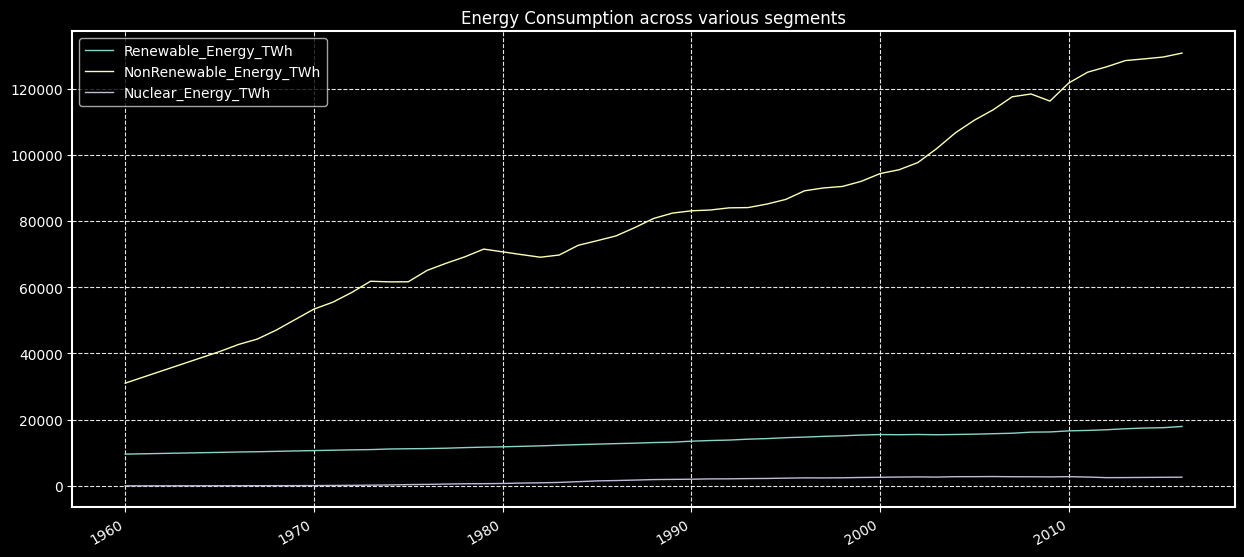

In [27]:
dataHolder.bucket[k].exploratory_plot()

## USA Consumer Price Index Data

In [28]:
k='usa_cpi'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

USA Consumer Price Index (Monthly), from 2007 to 2020


CPI
Date               
2007-10-01  209.190
2007-11-01  210.834
2007-12-01  211.445
2008-01-01  212.174
2008-02-01  212.687

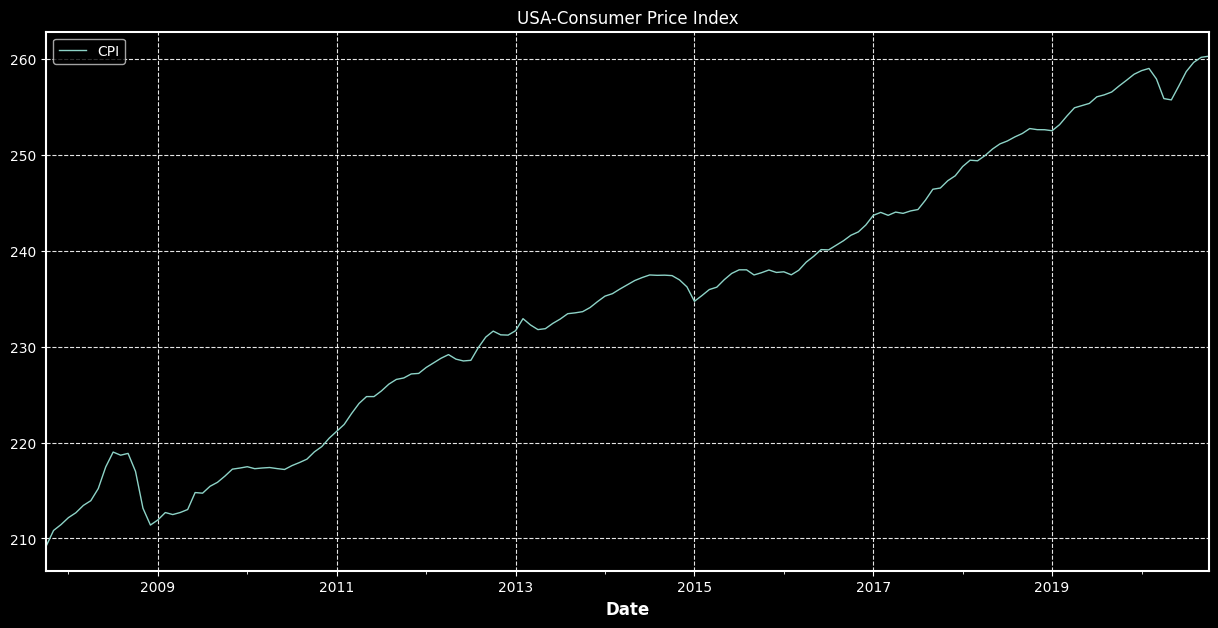

In [29]:
dataHolder.bucket[k].exploratory_plot()

## Anti-Diabetic Drug Sales Data

In [32]:
k='anti_diabetic'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Anti-Diabetic Drug Sales (Monthly), prices in $ Million, from 1992 to 2008


value
index               
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869

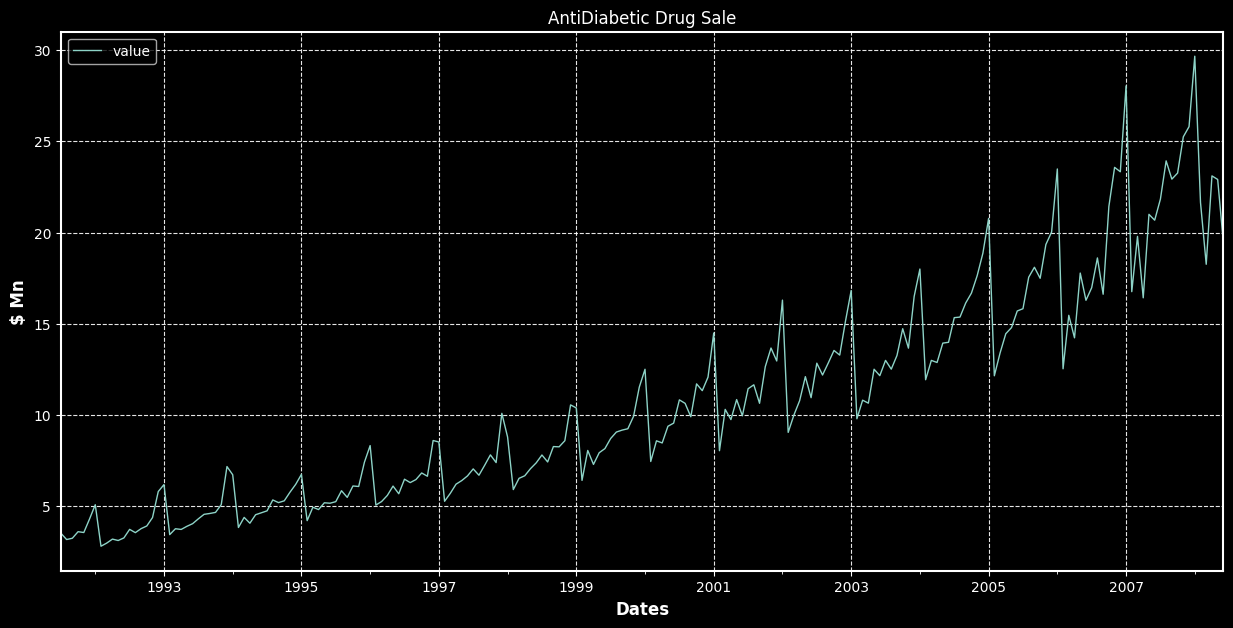

In [33]:
dataHolder.bucket[k].exploratory_plot()

## Australlia Electricity Production

In [34]:
k='aus_elecprod'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Australlian Electricity Production (Monthly) with Missing Values, Numbers in billion kWh, from 1956 to 1995


Production
index                 
1956-01-01        1254
1956-02-01        1290
1956-03-01        1379
1956-04-01        1346
1956-05-01        1535

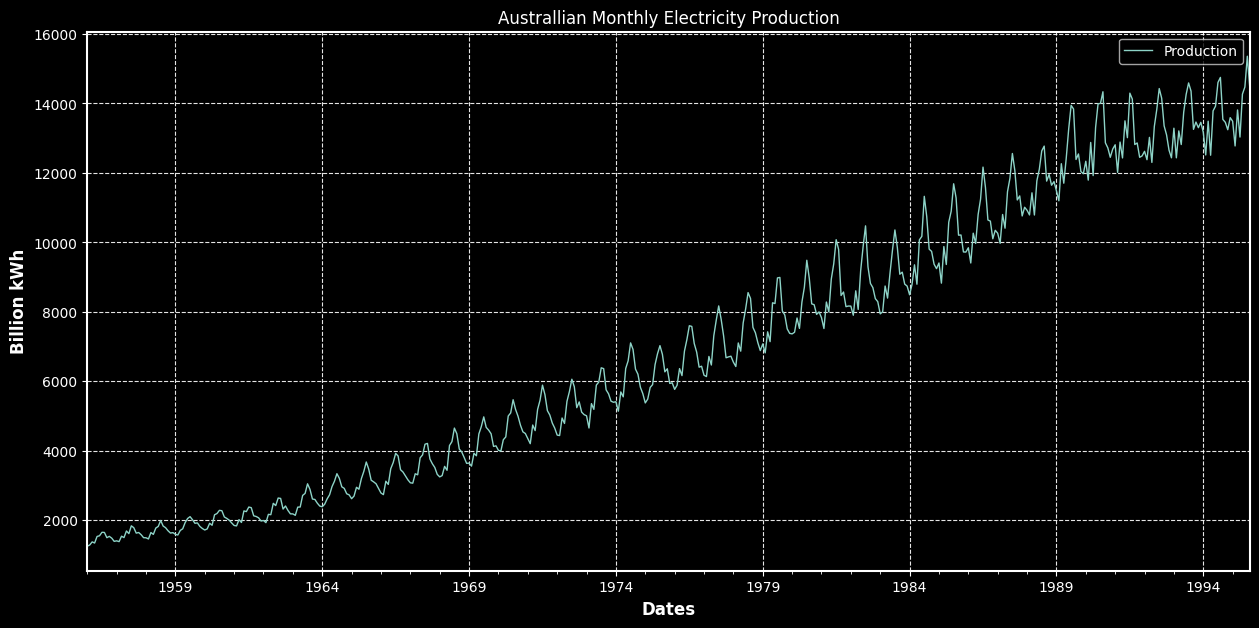

In [35]:
dataHolder.bucket[k].exploratory_plot()

## Visitors 20 Regions

In [36]:
k='visitor_20r'
print(dataHolder.bucket[k].long_description)
dataHolder.bucket[k].data.head()

Number of Visitors in 20 Regions of Australlia (Quaterly), in Million, from 1998 to 2016


Regions  Visitors
Quarter                       
1998-01-01  NSWMetro  9.047095
1998-04-01  NSWMetro  6.962126
1998-07-01  NSWMetro  6.871963
1998-10-01  NSWMetro  7.147293
1999-01-01  NSWMetro  7.956923

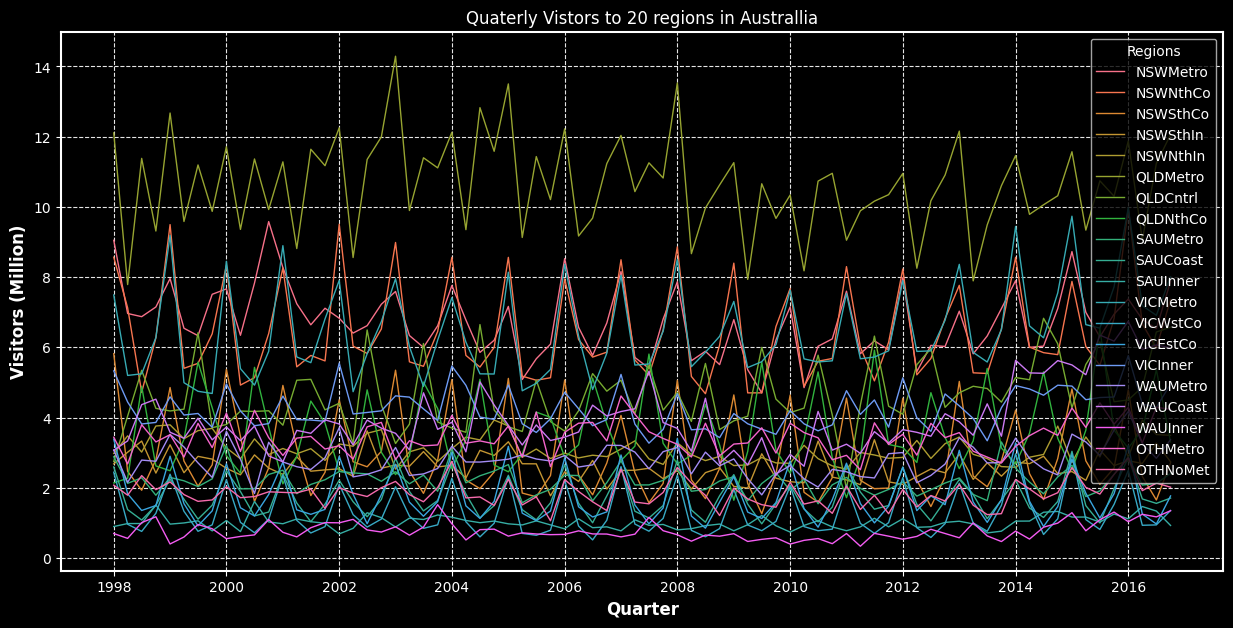

In [37]:
dataHolder.bucket[k].exploratory_plot()

# Different Types of Data

 - Time Series Data : Data collected against a ***Single feature*** across an equally spaced time span.
 
 - Cross-Sectional Data : Data collected against ***Multiple features*** at a single point in time.
 
 - Panel Data : Recording data for ***Multiple features at eaqually spaced time intervals***

In [40]:
cpi_data = dataHolder.bucket['india_cpi'].data.copy()
cpi_data.head()

State           Description  Rural  Urban  Combined       Date
0       ALL India  Cereals and products  107.5  110.5     108.4 2013-01-01
1  Andhra Pradesh  Cereals and products  111.0  115.0     112.2 2013-01-01
2           Assam  Cereals and products  103.9  105.6     104.1 2013-01-01
3           Bihar  Cereals and products  107.3  110.2     107.6 2013-01-01
4    Chhattisgarh  Cereals and products  103.2  109.3     104.9 2013-01-01

<b>Time Series Data</b>

Notice the `Object` for data recording here is `State`, and the remainder are features.

Q) Can you tell what are the features of this dataset then?

In [41]:
tsdata = cpi_data[cpi_data.State.isin(['Delhi'])].copy()
tsdata = tsdata[:10].reset_index().drop('index', axis=1)
tsdata = tsdata.style.set_caption('Time Series Data') # Giving your data frame a title
tsdata

<b>Cross Sectional Data</b>

Notice the `Object` for data recording here is `State->Description`, and the remainder are features.


In [42]:
csdata = cpi_data[cpi_data.Date.isin(['2013-01-01'])].copy()
csdata = csdata[csdata.State.isin(['Delhi'])][:10]
csdata = csdata[:10].reset_index().drop('index', axis=1)
csdata = csdata.style.set_caption('Cross Sectional Data') # Giving your data frame a title
csdata

<b>Panel Data</b>

Notice the `Object` for data recording here is `State->Description`, and the remainder are features.



In [43]:
csdata = cpi_data[cpi_data.Date.isin(['2013-01-01', '2013-02-01'])].copy()
csdata = csdata[csdata.State.isin(['Delhi'])][:10]
csdata = csdata[:10].reset_index().drop('index', axis=1)
csdata = csdata.style.set_caption('Panel Data') # Giving your data frame a title
csdata

# Time Series Related Operations

 - Windows
 - Lags
 - Resampling
 - Differencing
 - Percentage Change
 - Imputation
 - Outlier Detection - #TODO


## Windows

- <b>Rolling Window</b> : Shifting a specified width window over the dataset.

- <b>Expanding Window</b> : Dynamic sized window that changes its window length in tandem with the dates, keeping the data from begining to the latest date, chronologically, in the window


<b>Rolling Window</b>

In [44]:
rolling_data = dataHolder.bucket['airp_data'].data.copy()

<AxesSubplot:xlabel='Month'>

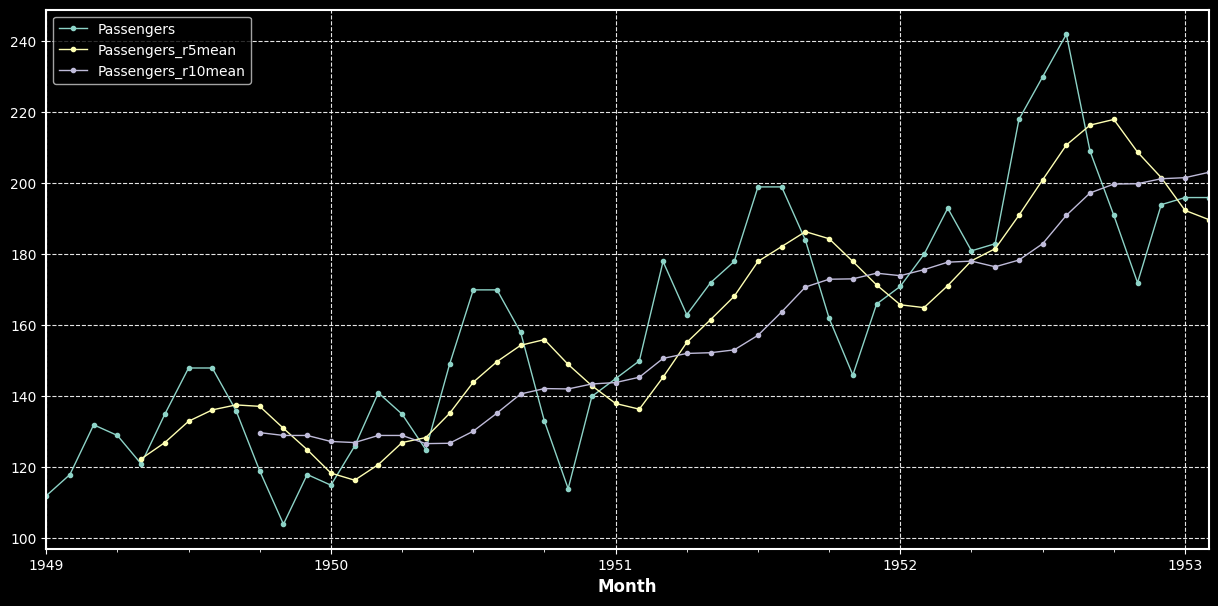

In [45]:
rolling_data['Passengers_r5mean'] = rolling_data.Passengers.rolling(5).mean()
rolling_data['Passengers_r10mean'] = rolling_data.Passengers.rolling(10).mean()
rolling_data[:50].plot(marker='o', markersize=3)

<b>Rolling Window</b> - Window Type

[scipy - Different Window Types](https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows)

<img src='https://docs.scipy.org/doc/scipy/reference/_images/scipy-signal-windows-exponential-1_00.png' width='250' align='left'>

<img src='https://docs.scipy.org/doc/scipy/reference/_images/scipy-signal-windows-triang-1_00.png' width='250' align='left'>

<img src='https://docs.scipy.org/doc/scipy/reference/_images/scipy-signal-windows-gaussian-1_00.png' width='250' align='left'>



In [46]:
rolling_data = dataHolder.bucket['airp_data'].data.copy()

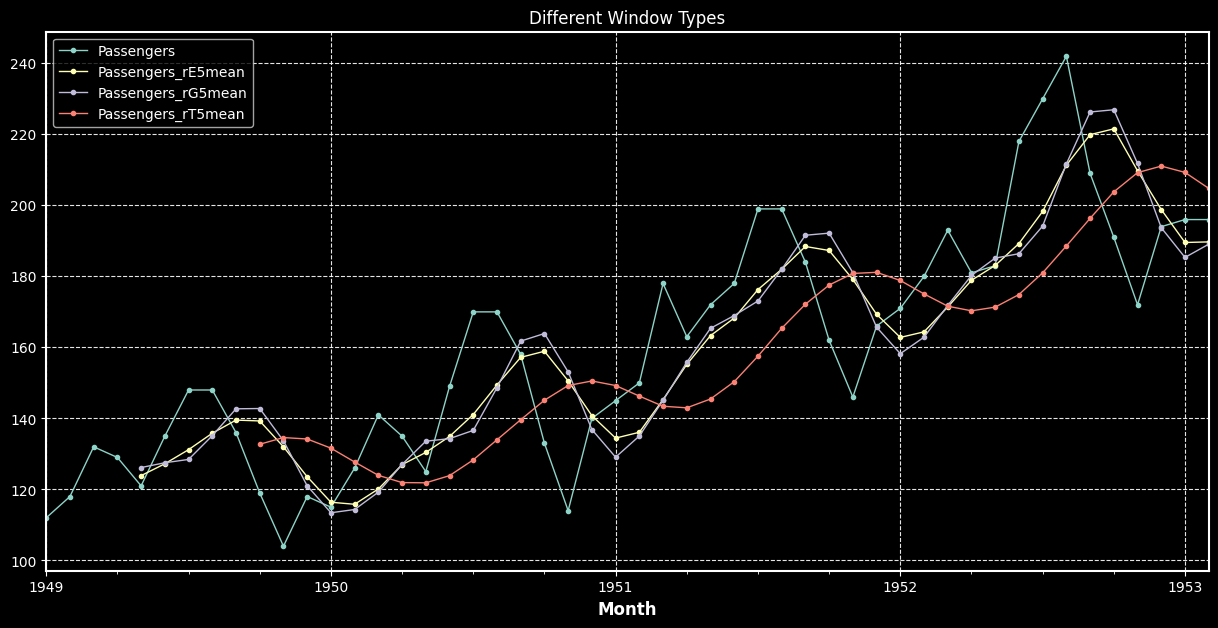

In [47]:
rolling_data['Passengers_rE5mean'] = rolling_data.Passengers.rolling(5, win_type='exponential').mean(tau=3)
rolling_data['Passengers_rG5mean'] = rolling_data.Passengers.rolling(5, win_type='gaussian').mean(std=1)
rolling_data['Passengers_rT5mean'] = rolling_data.Passengers.rolling(10, win_type='triang').mean()
_=rolling_data[:50].plot(marker='o', markersize=3, title='Different Window Types')

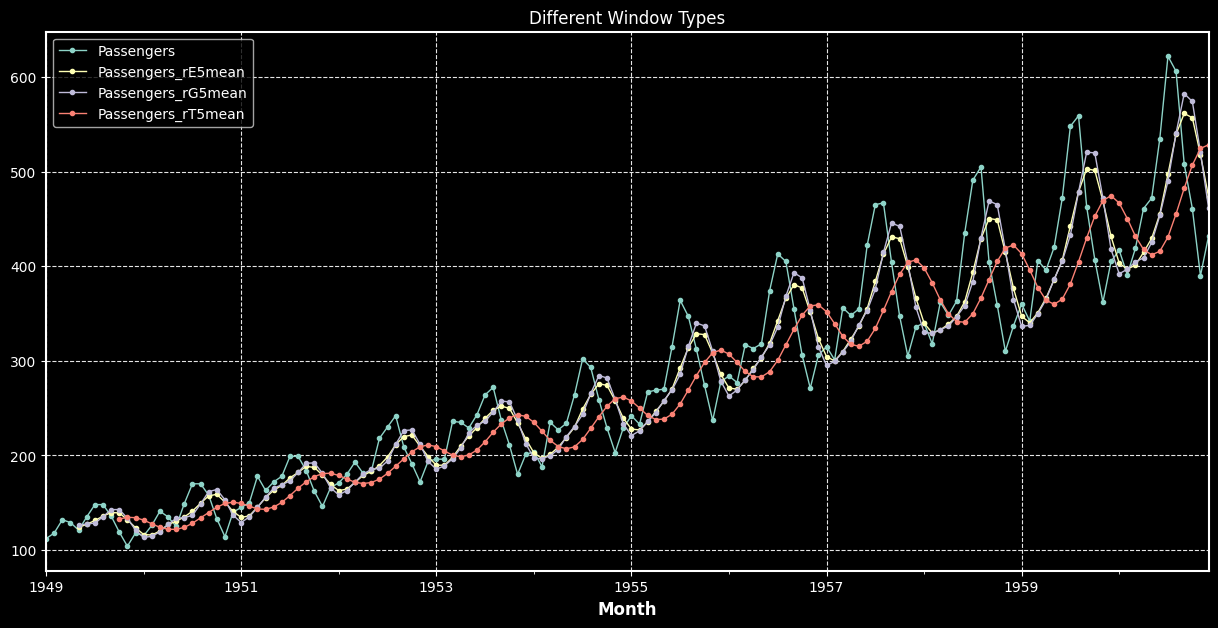

In [48]:
_=rolling_data.plot(marker='o', markersize=3, title='Different Window Types')

<b>Expanding Window</b>

In [49]:
expanding_data = dataHolder.bucket['airp_data'].data.copy()

Will there be any difference between the different windows for expanding windows?

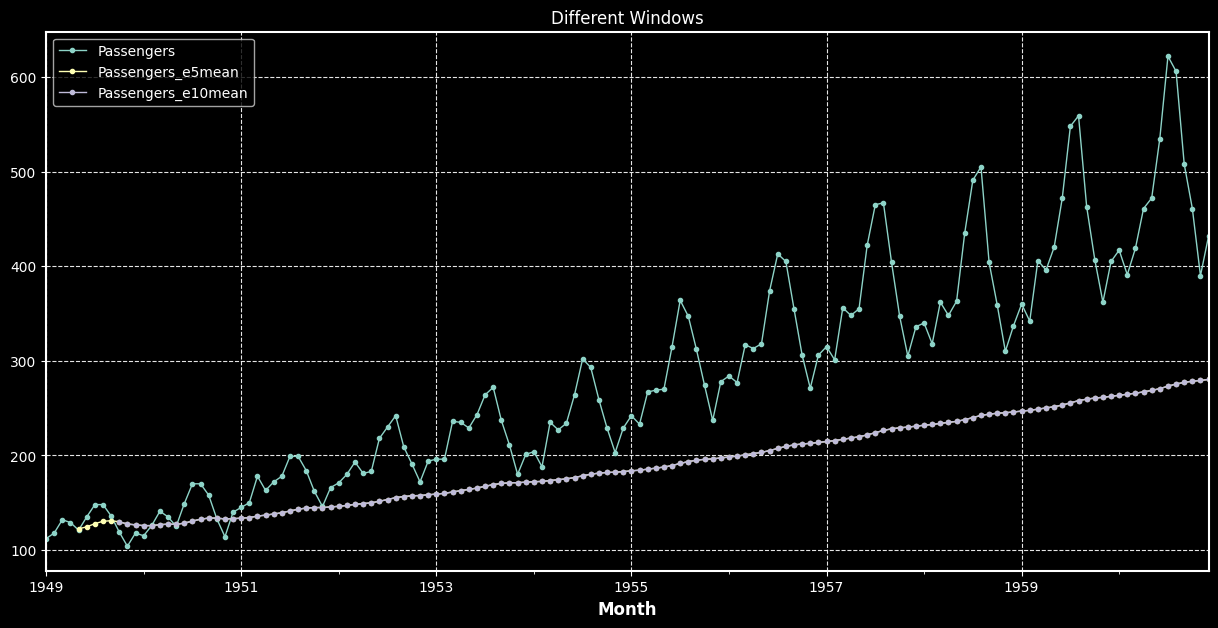

In [50]:
expanding_data['Passengers_e5mean'] = expanding_data.Passengers.expanding(5).mean()
expanding_data['Passengers_e10mean'] = expanding_data.Passengers.expanding(10).mean()
_=expanding_data.plot(marker='o', markersize=3, title='Different Windows')

Take a moment and think when is it that you will use Expanding Window and Rolling Window?
- Example Maximum DD uptil now, in a Trading Strategy.

## Lags

Since the time series data is collected over a period of time, datapoints adjacent of `Timestamps` might have relation with one another, hence it becomes appropriate to consider the `Lagged` values of time series in your analysis

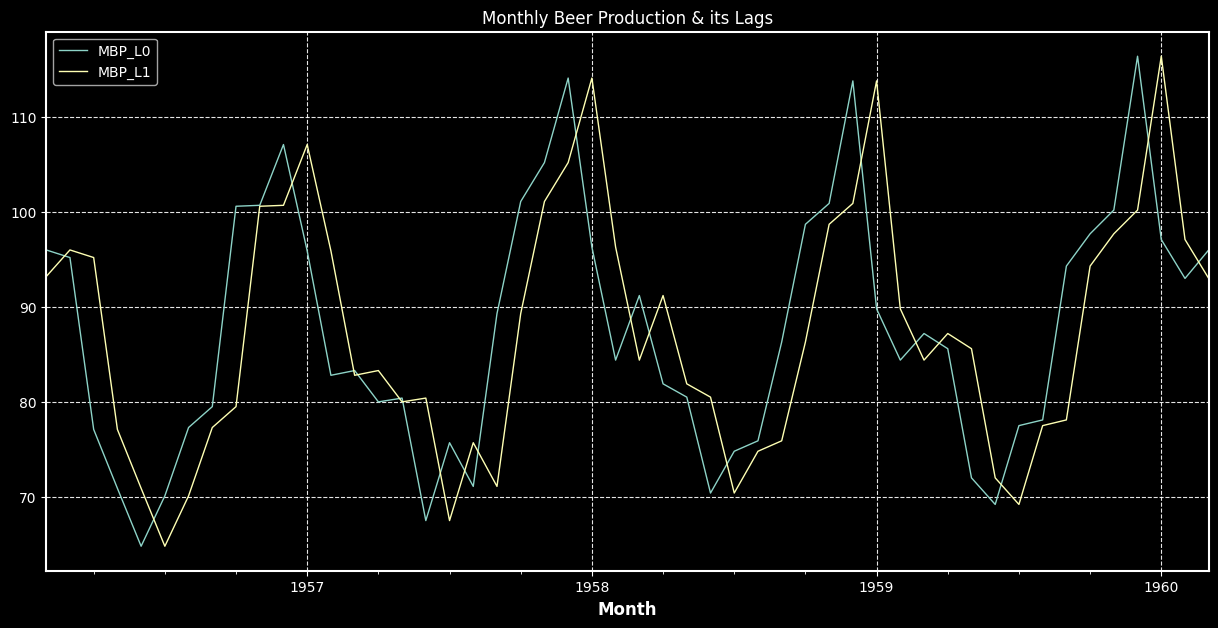

In [54]:
lagdata = dataHolder.bucket['beer_prod'].data.copy()
lagdata.columns = ['MBP_L0']
lagdata['MBP_L1']  = lagdata.MBP_L0.shift(1)
# lagdata['MBP_L6']  = lagdata.MBP_L0.shift(6)
# lagdata['MBP_L12'] = lagdata.MBP_L0.shift(12)
# lagdata['MBP_L24'] = lagdata.MBP_L0.shift(24)
_=lagdata.dropna()[:50].plot(title='Monthly Beer Production & its Lags')

## Resampling
Changing frequency of the time series dataset, and applying aggregation functions over them

In [55]:
britanniastock_data=dataHolder.bucket['brit_stock'].data.copy()

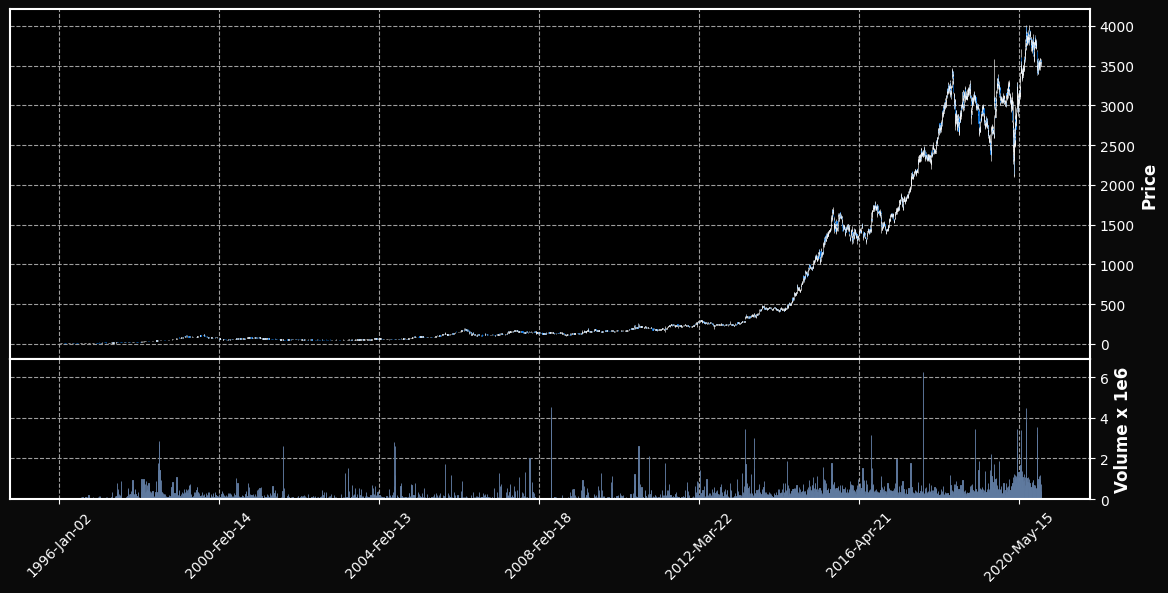

In [56]:
resampled_data = britanniastock_data.resample('2M').agg({'Open':'first',
                                                          'High':'max',
                                                          'Low':'min',
                                                          'Close':'last',
                                                          'Volume':'sum'})
mpl.plot(britanniastock_data, figsize=(15,7),
         type='candle', volume=True, style='mike')

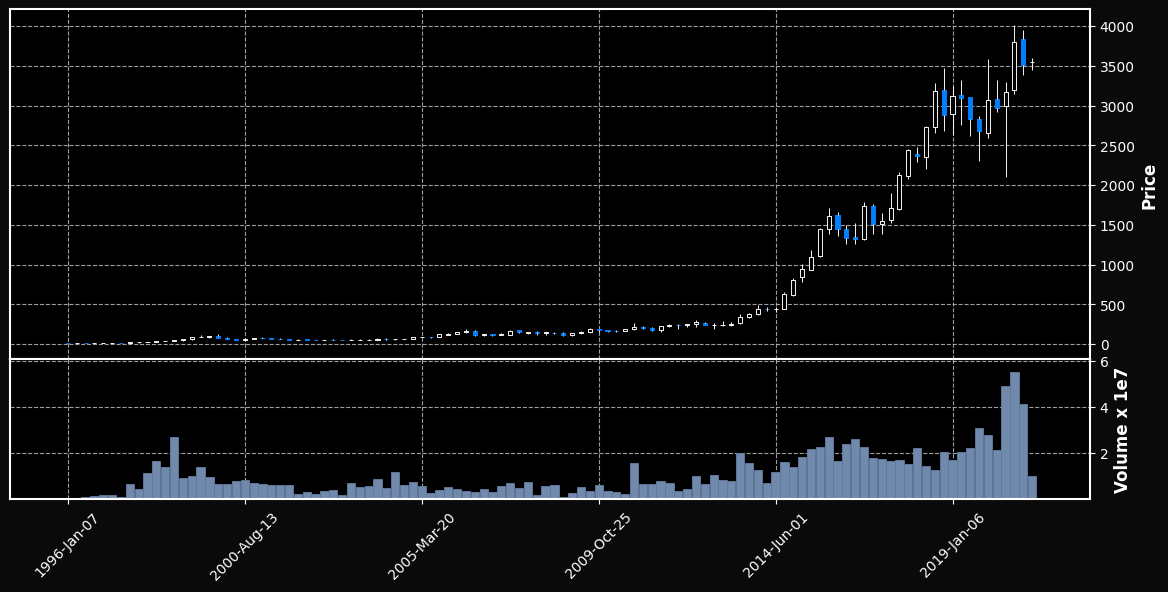

In [57]:
resampled_data = britanniastock_data.resample('12W', label='right').agg({'Open':'first',
                                                                        'High':'max',
                                                                        'Low':'min',
                                                                        'Close':'last',
                                                                        'Volume':'sum'})
mpl.plot(resampled_data, figsize=(15,7),
         type='candle', volume=True, style='mike')

In [58]:
britanniastock_data.resample('2W', label='right').agg({'Open':'first',
                                                          'High':'max',
                                                          'Low':'min',
                                                          'Close':'last',
                                                          'Volume':'sum'})

Open         High         Low        Close      Volume
Date                                                                     
1996-01-07    10.600000    10.666700    10.46670    10.473300     10500.0
1996-01-21    10.333300    10.533300     9.46667     9.866670     12000.0
1996-02-04     9.833330    11.466700     9.60000    11.466700     45000.0
1996-02-18    11.466700    13.666700    11.46670    12.700000    126000.0
1996-03-03    12.666700    13.666700    12.66670    13.333300    160500.0
...                 ...          ...         ...          ...         ...
2020-10-11  3710.899902  3879.949951  3689.00000  3745.100098   4149742.0
2020-10-25  3769.100098  3835.949951  3382.00000  3469.750000  12479419.0
2020-11-08  3482.000000  3599.800049  3390.00000  3513.550049   8129624.0
2020-11-22  3548.000000  3577.750000  3445.00000  3552.100098   7318391.0
2020-12-06  3575.000000  3599.000000  3490.00000  3548.750000   2833122.0

[651 rows x 5 columns]

## Differencing & Percentage Change

 - Differencing : Taking a <b>difference of the value at $t_{i}$ with $t_{i-n}$</b>, where n is the period
 - Percentage Change : <b>Change observed in the value at $t_{i}$ w.r.t $t_{i-n}$</b>, where n is the period


In [59]:
houseprices_data = dataHolder.bucket['house_price'].data.copy()

In [61]:
chicago_prices = houseprices_data[houseprices_data.Region=='Chicago'].copy()
chicago_prices.drop(['Region'], axis=1, inplace=True)
chicago_prices['Price_diffP1'] = chicago_prices.Price.diff(1)
chicago_prices['Price_diffP2'] = chicago_prices.Price.diff(2)

chicago_prices['Price_pctP1'] = chicago_prices.Price.pct_change(1)
chicago_prices['Price_pctP2'] = chicago_prices.Price.pct_change(2)
chicago_prices = chicago_prices.dropna()
chicago_prices.head()

Price  Price_diffP1  Price_diffP2  Price_pctP1  Price_pctP2
Month                                                                     
2008-05-01  286900.0      -27900.0      -38200.0    -0.088628    -0.117502
2008-06-01  274600.0      -12300.0      -40200.0    -0.042872    -0.127700
2008-07-01  268500.0       -6100.0      -18400.0    -0.022214    -0.064134
2008-08-01  264400.0       -4100.0      -10200.0    -0.015270    -0.037145
2008-09-01  267100.0        2700.0       -1400.0     0.010212    -0.005214

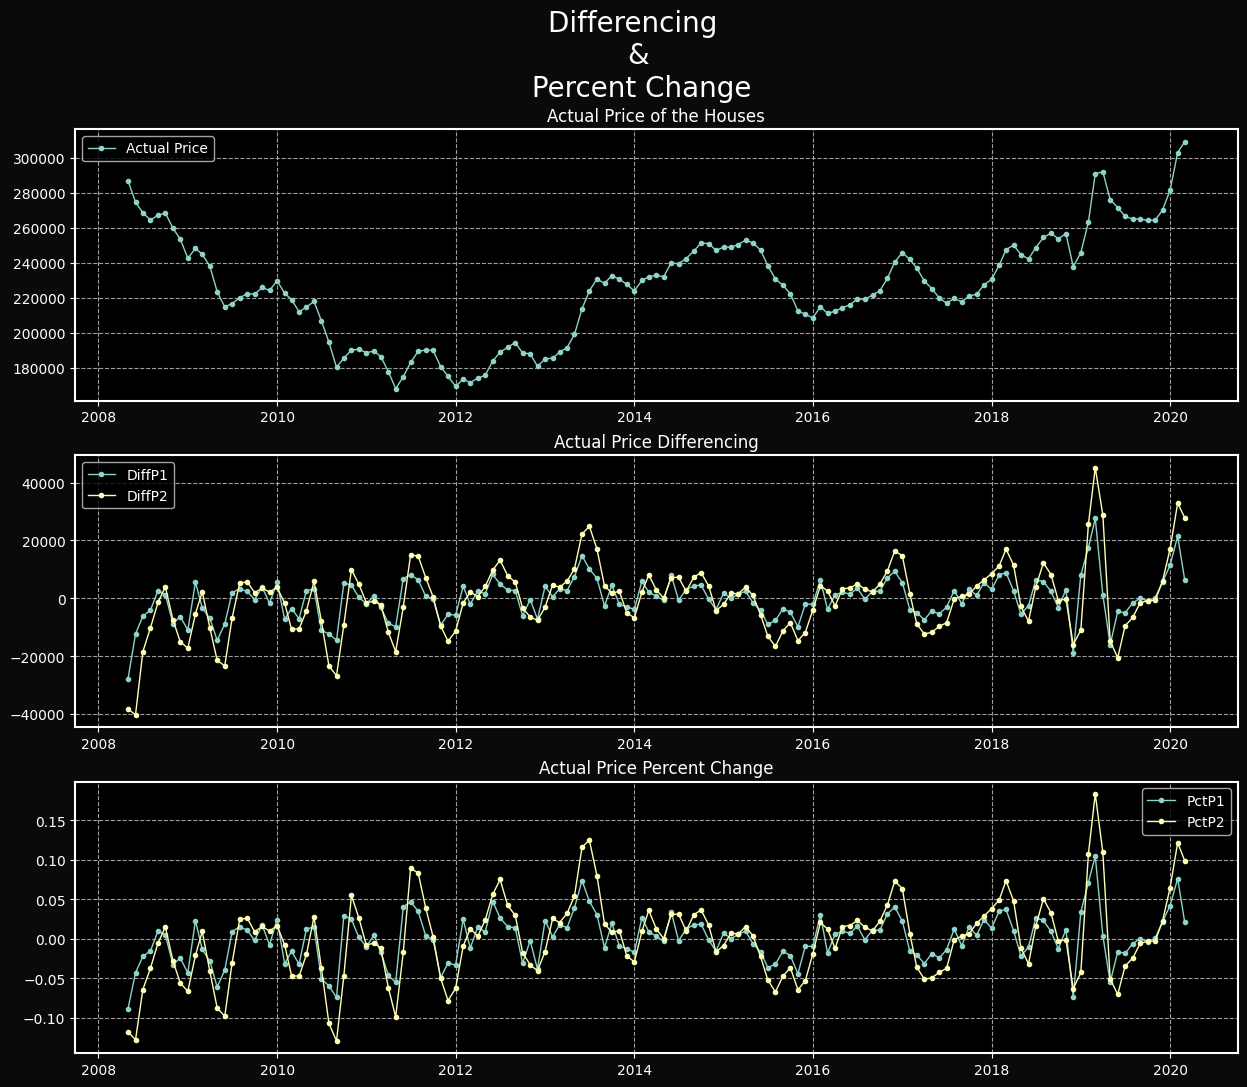

In [62]:
fig,axes = plt.subplots(3,1,figsize=(15,12))
_=axes[0].plot(chicago_prices.Price, marker='o', markersize=3, label='Actual Price')
_=axes[0].legend()
_=axes[0].set_title('Actual Price of the Houses')

_=axes[1].plot(chicago_prices.Price_diffP1, marker='o', markersize=3, label='DiffP1')
_=axes[1].plot(chicago_prices.Price_diffP2, marker='o', markersize=3, label='DiffP2')
_=axes[1].legend()
_=axes[1].set_title('Actual Price Differencing')

_=axes[2].plot(chicago_prices.Price_pctP1, marker='o', markersize=3, label='PctP1')
_=axes[2].plot(chicago_prices.Price_pctP2, marker='o', markersize=3, label='PctP2')
_=axes[2].legend()
_=axes[2].set_title('Actual Price Percent Change')

_=fig.suptitle('Differencing \n&\n Percent Change', fontsize=20)


## Imputation

Simply put, Filling in the Missing Values.

- fillna - Static Value Imputation
- bfill - Backward Fill
- ffill - Forward Fill
- interpolate - `spline`, `polynomial`, `linear`, `quadratic`, `barycentric`, `pchip`, `akima`, 
- rfimpute - Random Forest Imputation
- kNN - K Nearest Neighbours
- PoP Imputation - Period Over Period Imputation

NOTE : Be wary while usgin `polynomial` interpolation as it can induce ocsillations in the dataset, a phenomenon known as [Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)

<b>Interesting Read</b> : [Working with Missing Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#filling-with-a-pandasobject)


<b>Filling a Static Value for the NaN columns</b>

In [65]:
def get_uv_impplot(data, title):
    data=data.reset_index().copy()
    fig, axes = plt.subplots()
    from matplotlib.cm import get_cmap
    name = "Pastel1"
    cmap = get_cmap(name)
    colors = cmap.colors
    axes.set_prop_cycle(color=colors)
    for ecol in [k for k in data.columns if 'Imputed' in k]:
        sns.lineplot(x='Date', y=ecol, data=data, label=ecol,
                     linestyle='-.', marker='o', markersize=3, ax=axes)
    sns.lineplot(x='Date', y='Actual', data=data, label='Actual',
                 color='b', linestyle='-.', marker='o', markersize=3, ax=axes)
    axes.set_title(title)
    plt.close()
    return fig

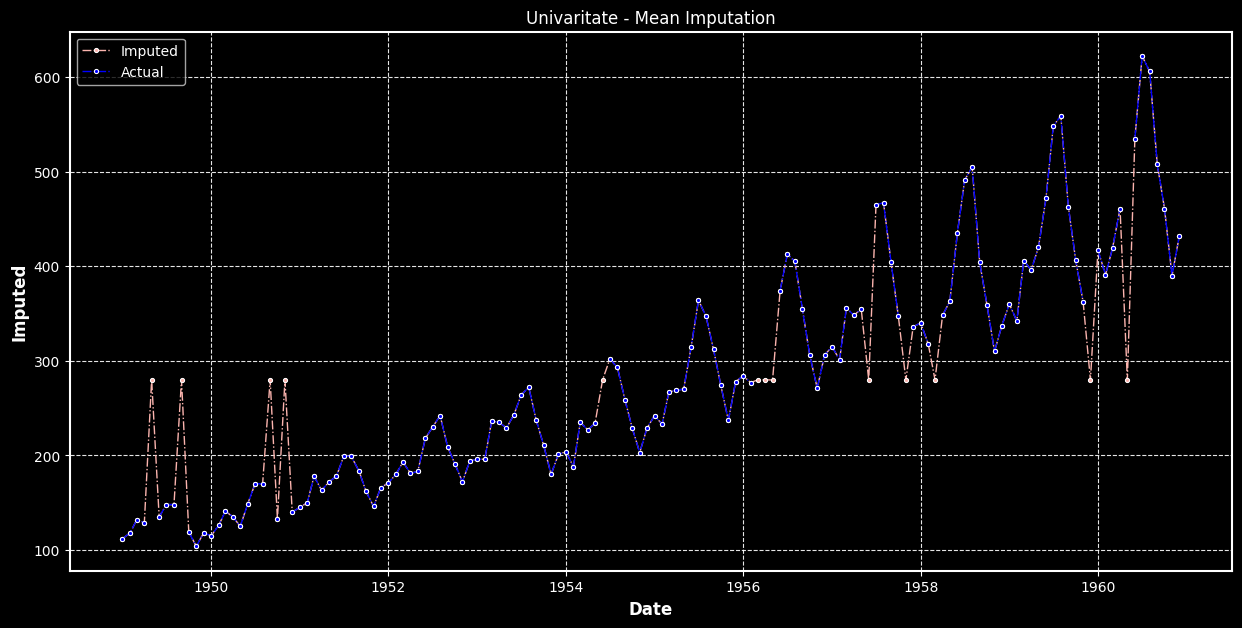

In [69]:
fillna_imputeUV = dataHolder.bucket['airp_data_missing'].data.copy()
fillna_imputeUV.columns=['Actual']
fillna_imputeUV['Imputed'] = fillna_imputeUV.fillna(fillna_imputeUV.Actual.mean())

get_uv_impplot(fillna_imputeUV, title='Univaritate - Mean Imputation')

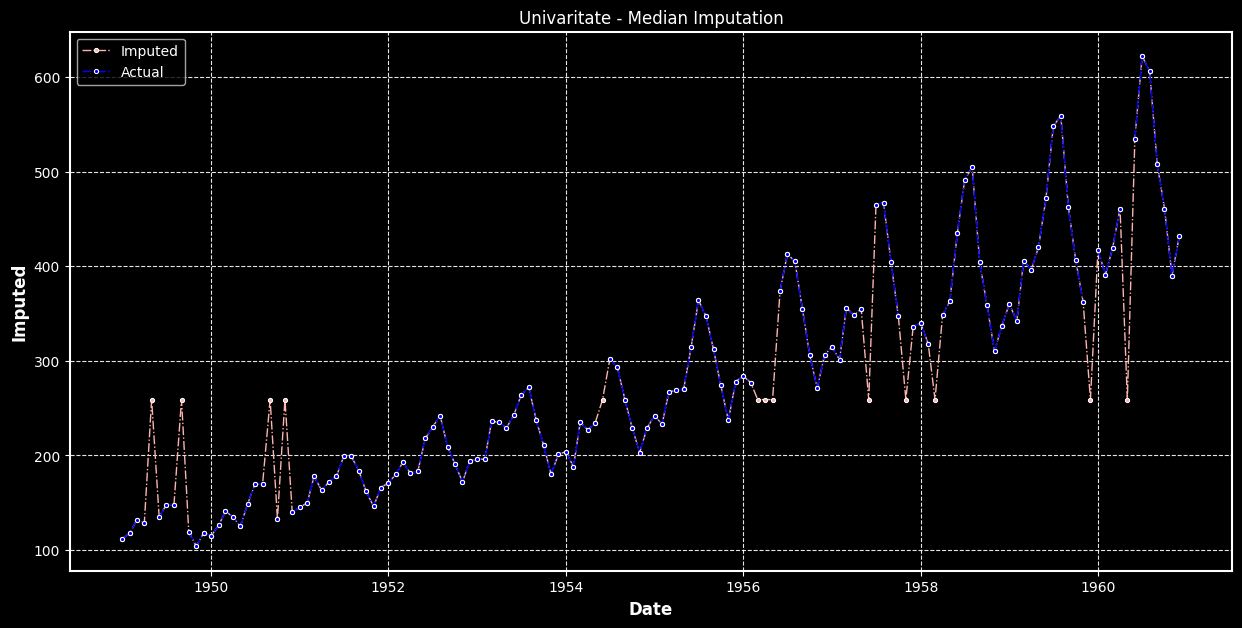

In [70]:
fillna_imputeUV = dataHolder.bucket['airp_data_missing'].data.copy()
fillna_imputeUV.columns=['Actual']
fillna_imputeUV['Imputed'] = fillna_imputeUV.fillna(fillna_imputeUV.Actual.median())

get_uv_impplot(fillna_imputeUV, title='Univaritate - Median Imputation')

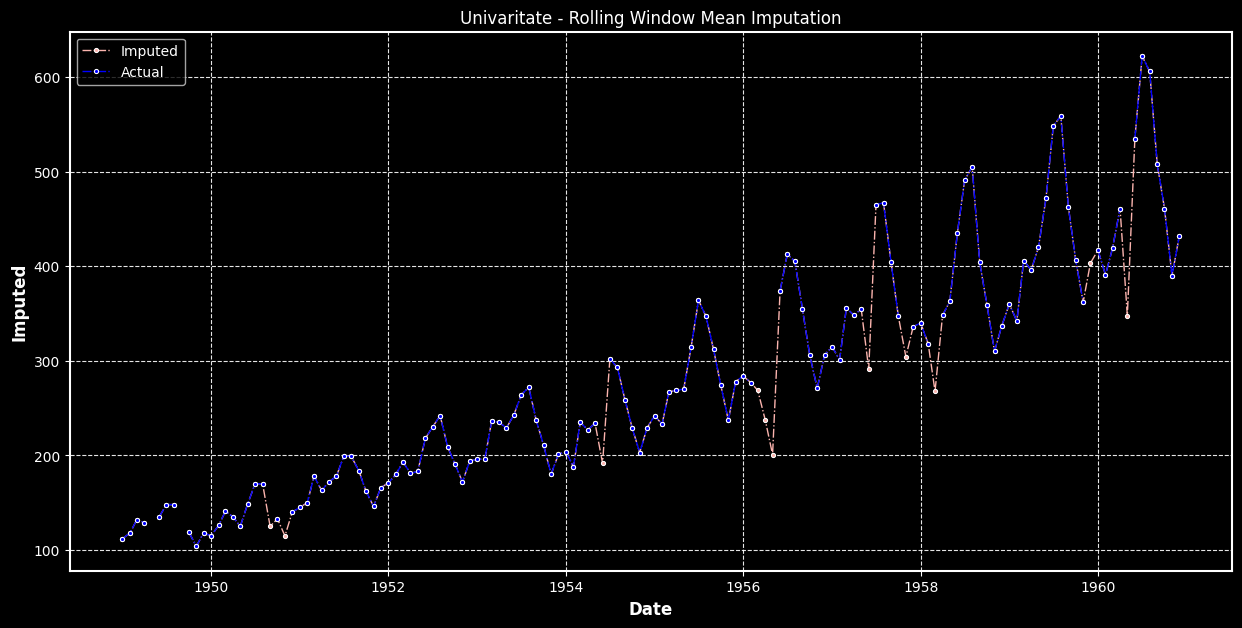

In [71]:
fillna_imputeUV = dataHolder.bucket['airp_data_missing'].data.copy()
fillna_imputeUV.columns=['Actual']

fillna_imputeUV['Imputed'] = fillna_imputeUV.Actual.fillna(0).rolling(window=10).mean()
fillna_imputeUV['Imputed'] = fillna_imputeUV.apply(lambda x : \
                                                   x.Imputed if pd.isna(x.Actual) else x.Actual, axis=1)

get_uv_impplot(fillna_imputeUV, title='Univaritate - Rolling Window Mean Imputation')

<b>Forward and Backward Fill</b>

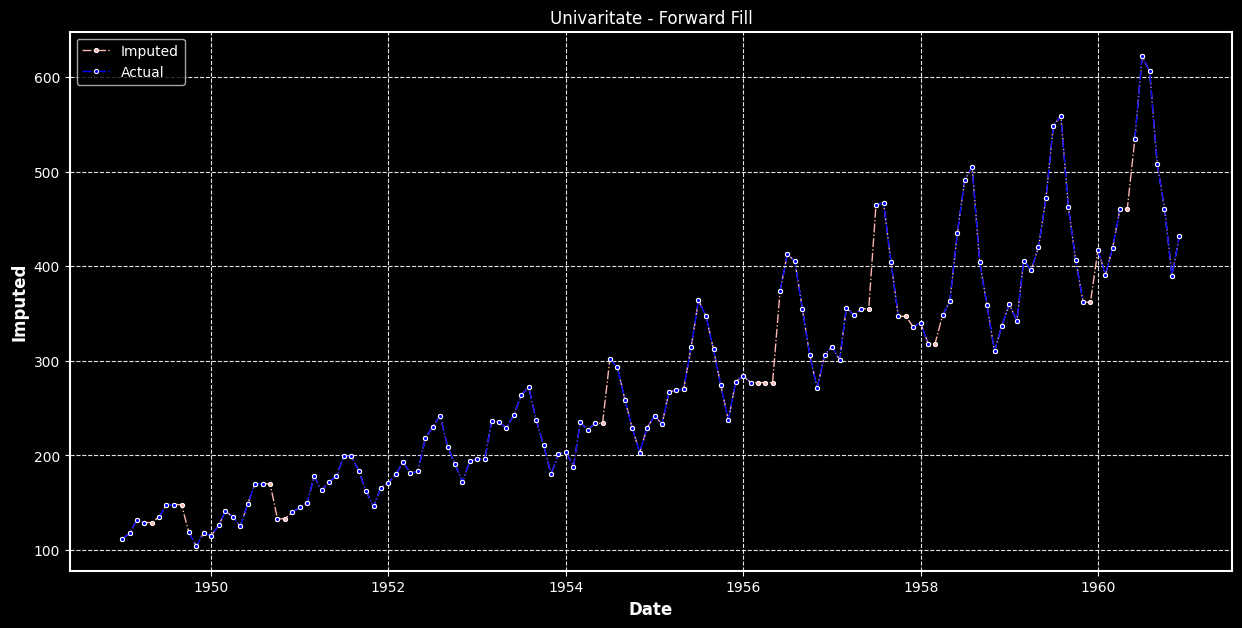

In [72]:
ffill_imputeUV = dataHolder.bucket['airp_data_missing'].data.copy()
ffill_imputeUV.columns=['Actual']
ffill_imputeUV['Imputed'] = ffill_imputeUV.Actual.ffill()

get_uv_impplot(ffill_imputeUV, title='Univaritate - Forward Fill')

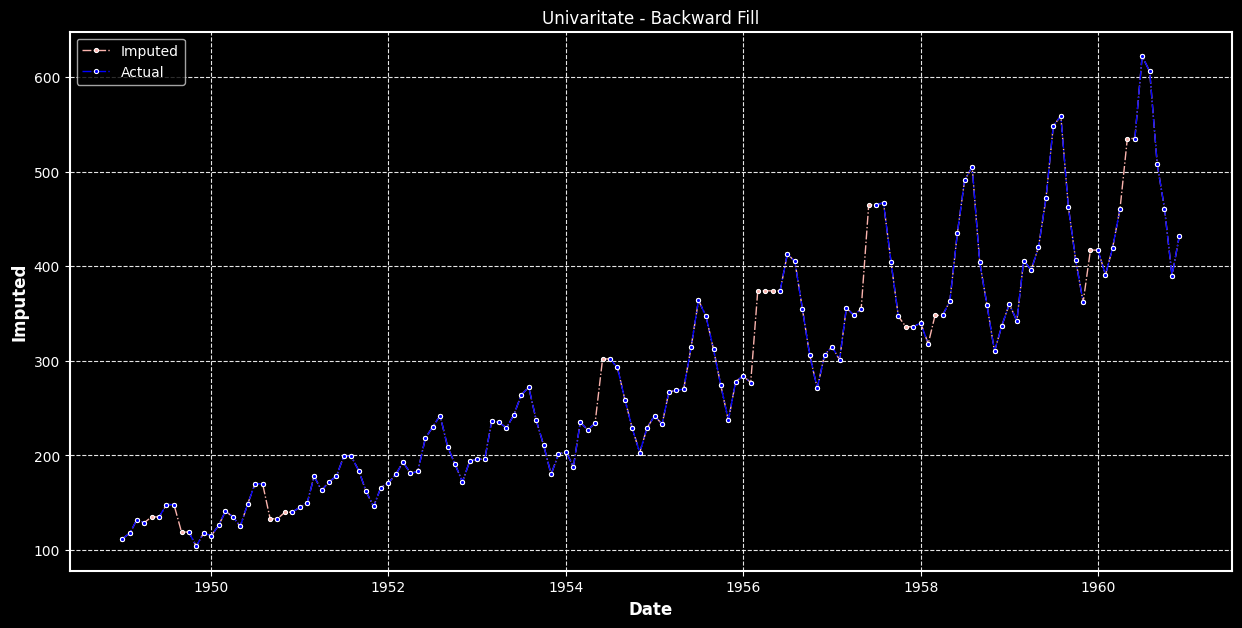

In [73]:
bfill_imputeUV = dataHolder.bucket['airp_data_missing'].data.copy()
bfill_imputeUV.columns=['Actual']
bfill_imputeUV['Imputed'] = bfill_imputeUV.Actual.bfill()

get_uv_impplot(bfill_imputeUV, title='Univaritate - Backward Fill')

<b>Interpolation</b>

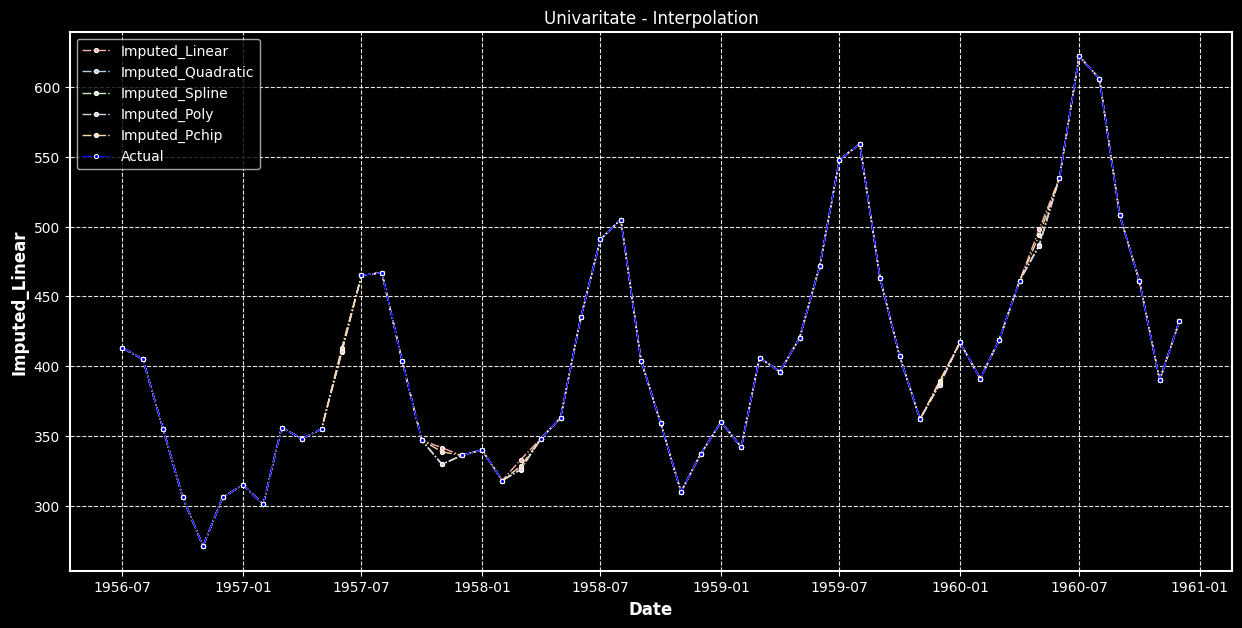

In [74]:
interp_imputeUV = dataHolder.bucket['airp_data_missing'].data.copy()
interp_imputeUV.columns=['Actual']
interp_imputeUV['Imputed_Linear'] = interp_imputeUV.Actual.interpolate(method='linear')
interp_imputeUV['Imputed_Quadratic'] = interp_imputeUV.Actual.interpolate(method='quadratic')
interp_imputeUV['Imputed_Spline'] = interp_imputeUV.Actual.interpolate(method='spline', order=2)
interp_imputeUV['Imputed_Poly'] = interp_imputeUV.Actual.interpolate(method='polynomial', order=2)
interp_imputeUV['Imputed_Pchip'] = interp_imputeUV.Actual.interpolate(method='pchip')

get_uv_impplot(interp_imputeUV[90:], title='Univaritate - Interpolation')

<b>Now, lets calculate which method of interpolation is the best for the given dataset?</b>

In [75]:
imp_check = dataHolder.bucket['airp_data_missing'].data.copy()
imp_check.columns=['Actual']
imp_check['Imputed_Linear'] = imp_check.Actual.interpolate(method='linear')
imp_check['Imputed_Quadratic'] = imp_check.Actual.interpolate(method='quadratic')
imp_check['Imputed_Spline'] = imp_check.Actual.interpolate(method='spline', order=2)
imp_check['Imputed_Poly'] = imp_check.Actual.interpolate(method='polynomial', order=2)
imp_check['Imputed_Pchip'] = imp_check.Actual.interpolate(method='pchip')
imp_check['Imputed_bfill'] = imp_check.Actual.bfill()
imp_check['Imputed_ffill'] = imp_check.Actual.ffill()

imp_check['Imputed_Rolling'] = imp_check.Actual.fillna(0).rolling(window=10).mean()
imp_check['Imputed_Rolling'] = imp_check.apply(lambda x : x.Imputed_Rolling if pd.isna(x.Actual) else x.Actual,
                                               axis=1)
imp_check['Imputed_Meanfill'] = imp_check.Actual.fillna(imp_check.Actual.mean())
imp_check['Imputed_Medialfill'] = imp_check.Actual.fillna(imp_check.Actual.median())
imp_check.head()


Actual  Imputed_Linear  Imputed_Quadratic  Imputed_Spline  \
Date                                                                    
1949-01-01   112.0           112.0         112.000000      112.000000   
1949-02-01   118.0           118.0         118.000000      118.000000   
1949-03-01   132.0           132.0         132.000000      132.000000   
1949-04-01   129.0           129.0         129.000000      129.000000   
1949-05-01     NaN           132.0         127.971802      128.276743   

            Imputed_Poly  Imputed_Pchip  Imputed_bfill  Imputed_ffill  \
Date                                                                    
1949-01-01    112.000000     112.000000          112.0          112.0   
1949-02-01    118.000000     118.000000          118.0          118.0   
1949-03-01    132.000000     132.000000          132.0          132.0   
1949-04-01    129.000000     129.000000          129.0          129.0   
1949-05-01    127.971802     130.631465          135.0          129.0   

            Imputed_Rolling  Imputed_Meanfill  Imputed_Medialfill  
Date                                                               
1949-01-01            112.0        112.000000               112.0  
1949-02-01            118.0        118.000000               118.0  
1949-03-01            132.0        132.000000               132.0  
1949-04-01            129.0        129.000000               129.0  
1949-05-01              NaN        279.816794               259.0

In [77]:
sse_df = pd.DataFrame(columns=['SSE'])
actual_data = dataHolder.bucket['airp_data'].data.copy()
sse_df.index.name = 'Imputation Type'
for ecol in [k for k in imp_check.columns if 'Imputed' in k]:
    imputation_name = " ".join(ecol.split('_'))
    score = ((imp_check[ecol]-actual_data['Passengers'])**2).sum()
    sse_df.loc[imputation_name, 'SSE'] = score


In [78]:
sse_df

SSE
Imputation Type            
Imputed Linear      5337.62
Imputed Quadratic   4649.13
Imputed Spline      4759.91
Imputed Poly        4649.13
Imputed Pchip       5231.62
Imputed bfill         20455
Imputed ffill         16349
Imputed Rolling       69469
Imputed Meanfill     172642
Imputed Medialfill   181164

<b>But do you think this is the right way to assess which `Interpolation` method to use?</b>

Ans) No!, we wont have the actual data to compare it with, Which Interpolation method to use is something that is very specific to the `Domain Knowledge` of the Time Series problem we are working on.

<b>Imputing missing data in Multivariate Dataset</b>

- Random Forest Imputation using Proximity Matrix, **Interesting Course :** [Intro To Machine Learning by Jeremy Howards & Rachel](https://course18.fast.ai/ml.html)
- KNN Imputation : **Interesting Read :** [sklearn docs](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation)

In [79]:
housepmiss_data = dataHolder.bucket['housing_missing'].data.copy()

In [80]:
from missingpy import MissForest, KNNImputer
imputer = MissForest()
X_imputed = imputer.fit_transform(housepmiss_data.values)
X_imputed_DF = pd.DataFrame(X_imputed, columns=housepmiss_data.columns)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [81]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_imputed = imputer.fit_transform(housepmiss_data.values)
X_imputed_DF = pd.DataFrame(X_imputed, columns=housepmiss_data.columns)
X_imputed_DF

crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

## Outlier Detection (Anomally Detection)

## Smoothing Operations

 - Moving Average
 - Exponential Smoothing
 - Holt Winter Exponential Smoothing
 - Fourier Smoothing

In [82]:
smoothing_data = dataHolder.bucket['beer_prod'].data.copy()
smoothing_data.columns = ['MBP']
smoothing_data['SmoothedData'] = np.nan
smoothing_data.head()

MBP  SmoothedData
Month                         
1956-01-01  93.2           NaN
1956-02-01  96.0           NaN
1956-03-01  95.2           NaN
1956-04-01  77.1           NaN
1956-05-01  70.9           NaN

<b>Moving Average Smoothing</b>

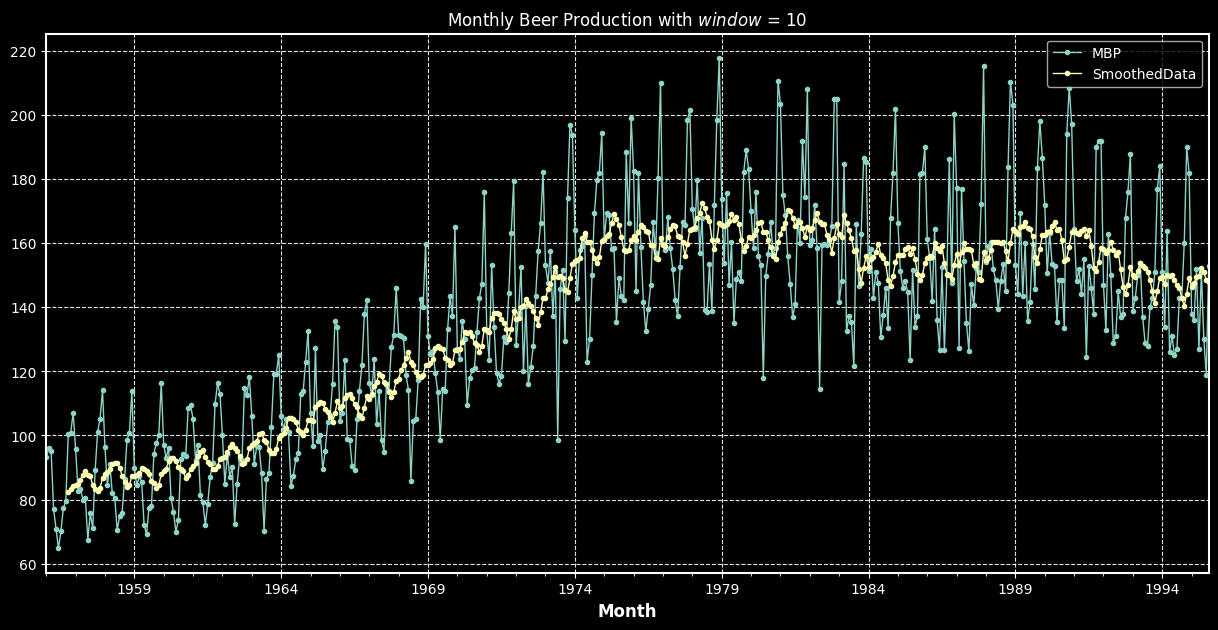

In [83]:
window_size = 10
smoothing_data['SmoothedData'] = smoothing_data.MBP.rolling(window=window_size).mean()

_=smoothing_data.plot(title=f'Monthly Beer Production with $window$ = {window_size}', 
                       linestyle='-', marker='o', markersize=3)

<b>Exponential Smoothing</b>

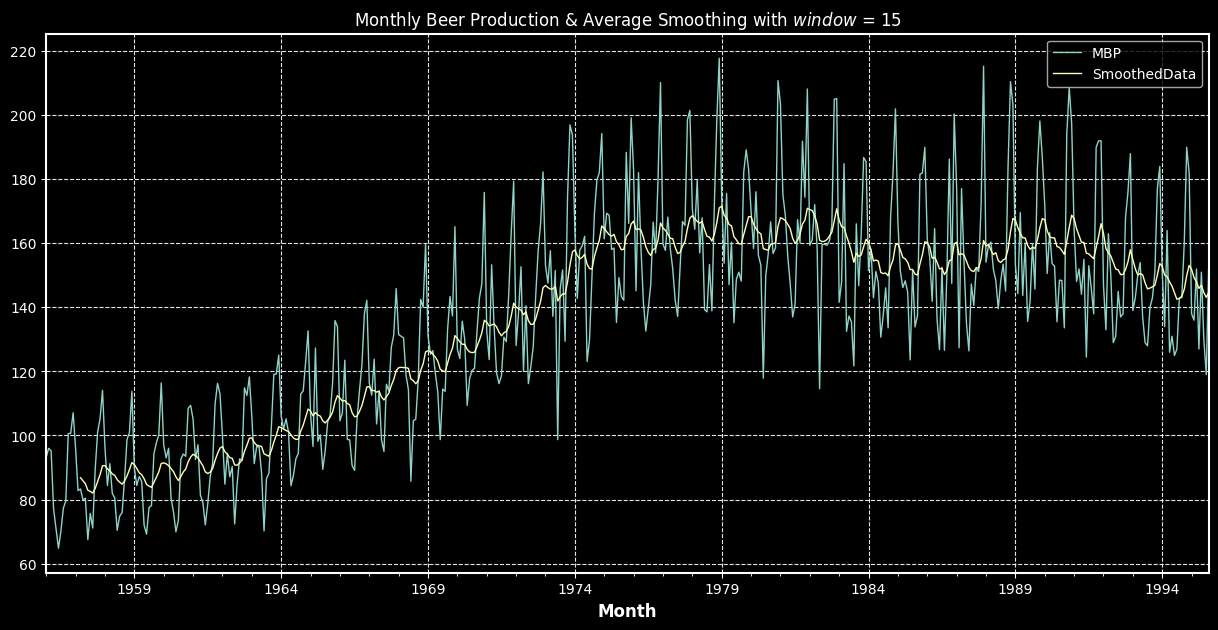

In [84]:
# Custom Definition of weights
window_size = 15
win_weights = np.diff(np.geomspace(1,2, window_size+1)-1)
def get_exp(x):
    global win_weights
    return sum(x.values*win_weights)

rolling = smoothing_data.MBP.rolling(window=window_size)
smoothing_data['SmoothedData'] = rolling.apply(lambda x : get_exp(x))

_=smoothing_data.plot(title=f'Monthly Beer Production & Average Smoothing with $window$ = {window_size}', 
                       linestyle='-',)

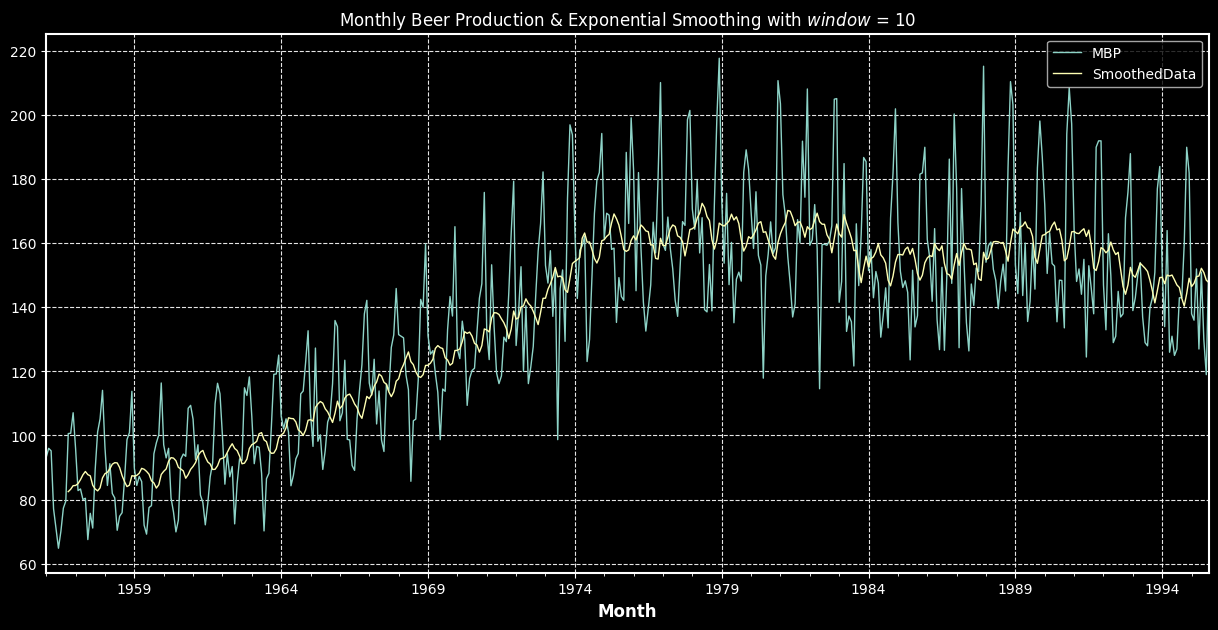

In [85]:
# pandas ewm
window_size = 10
smoothing_data['SmoothedData'] = smoothing_data.MBP.rolling(window=window_size).mean()

_=smoothing_data.plot(title=f'Monthly Beer Production & Exponential Smoothing with $window$ = {window_size}', 
                       linestyle='-')

<b>Fourier Smoothing</b>

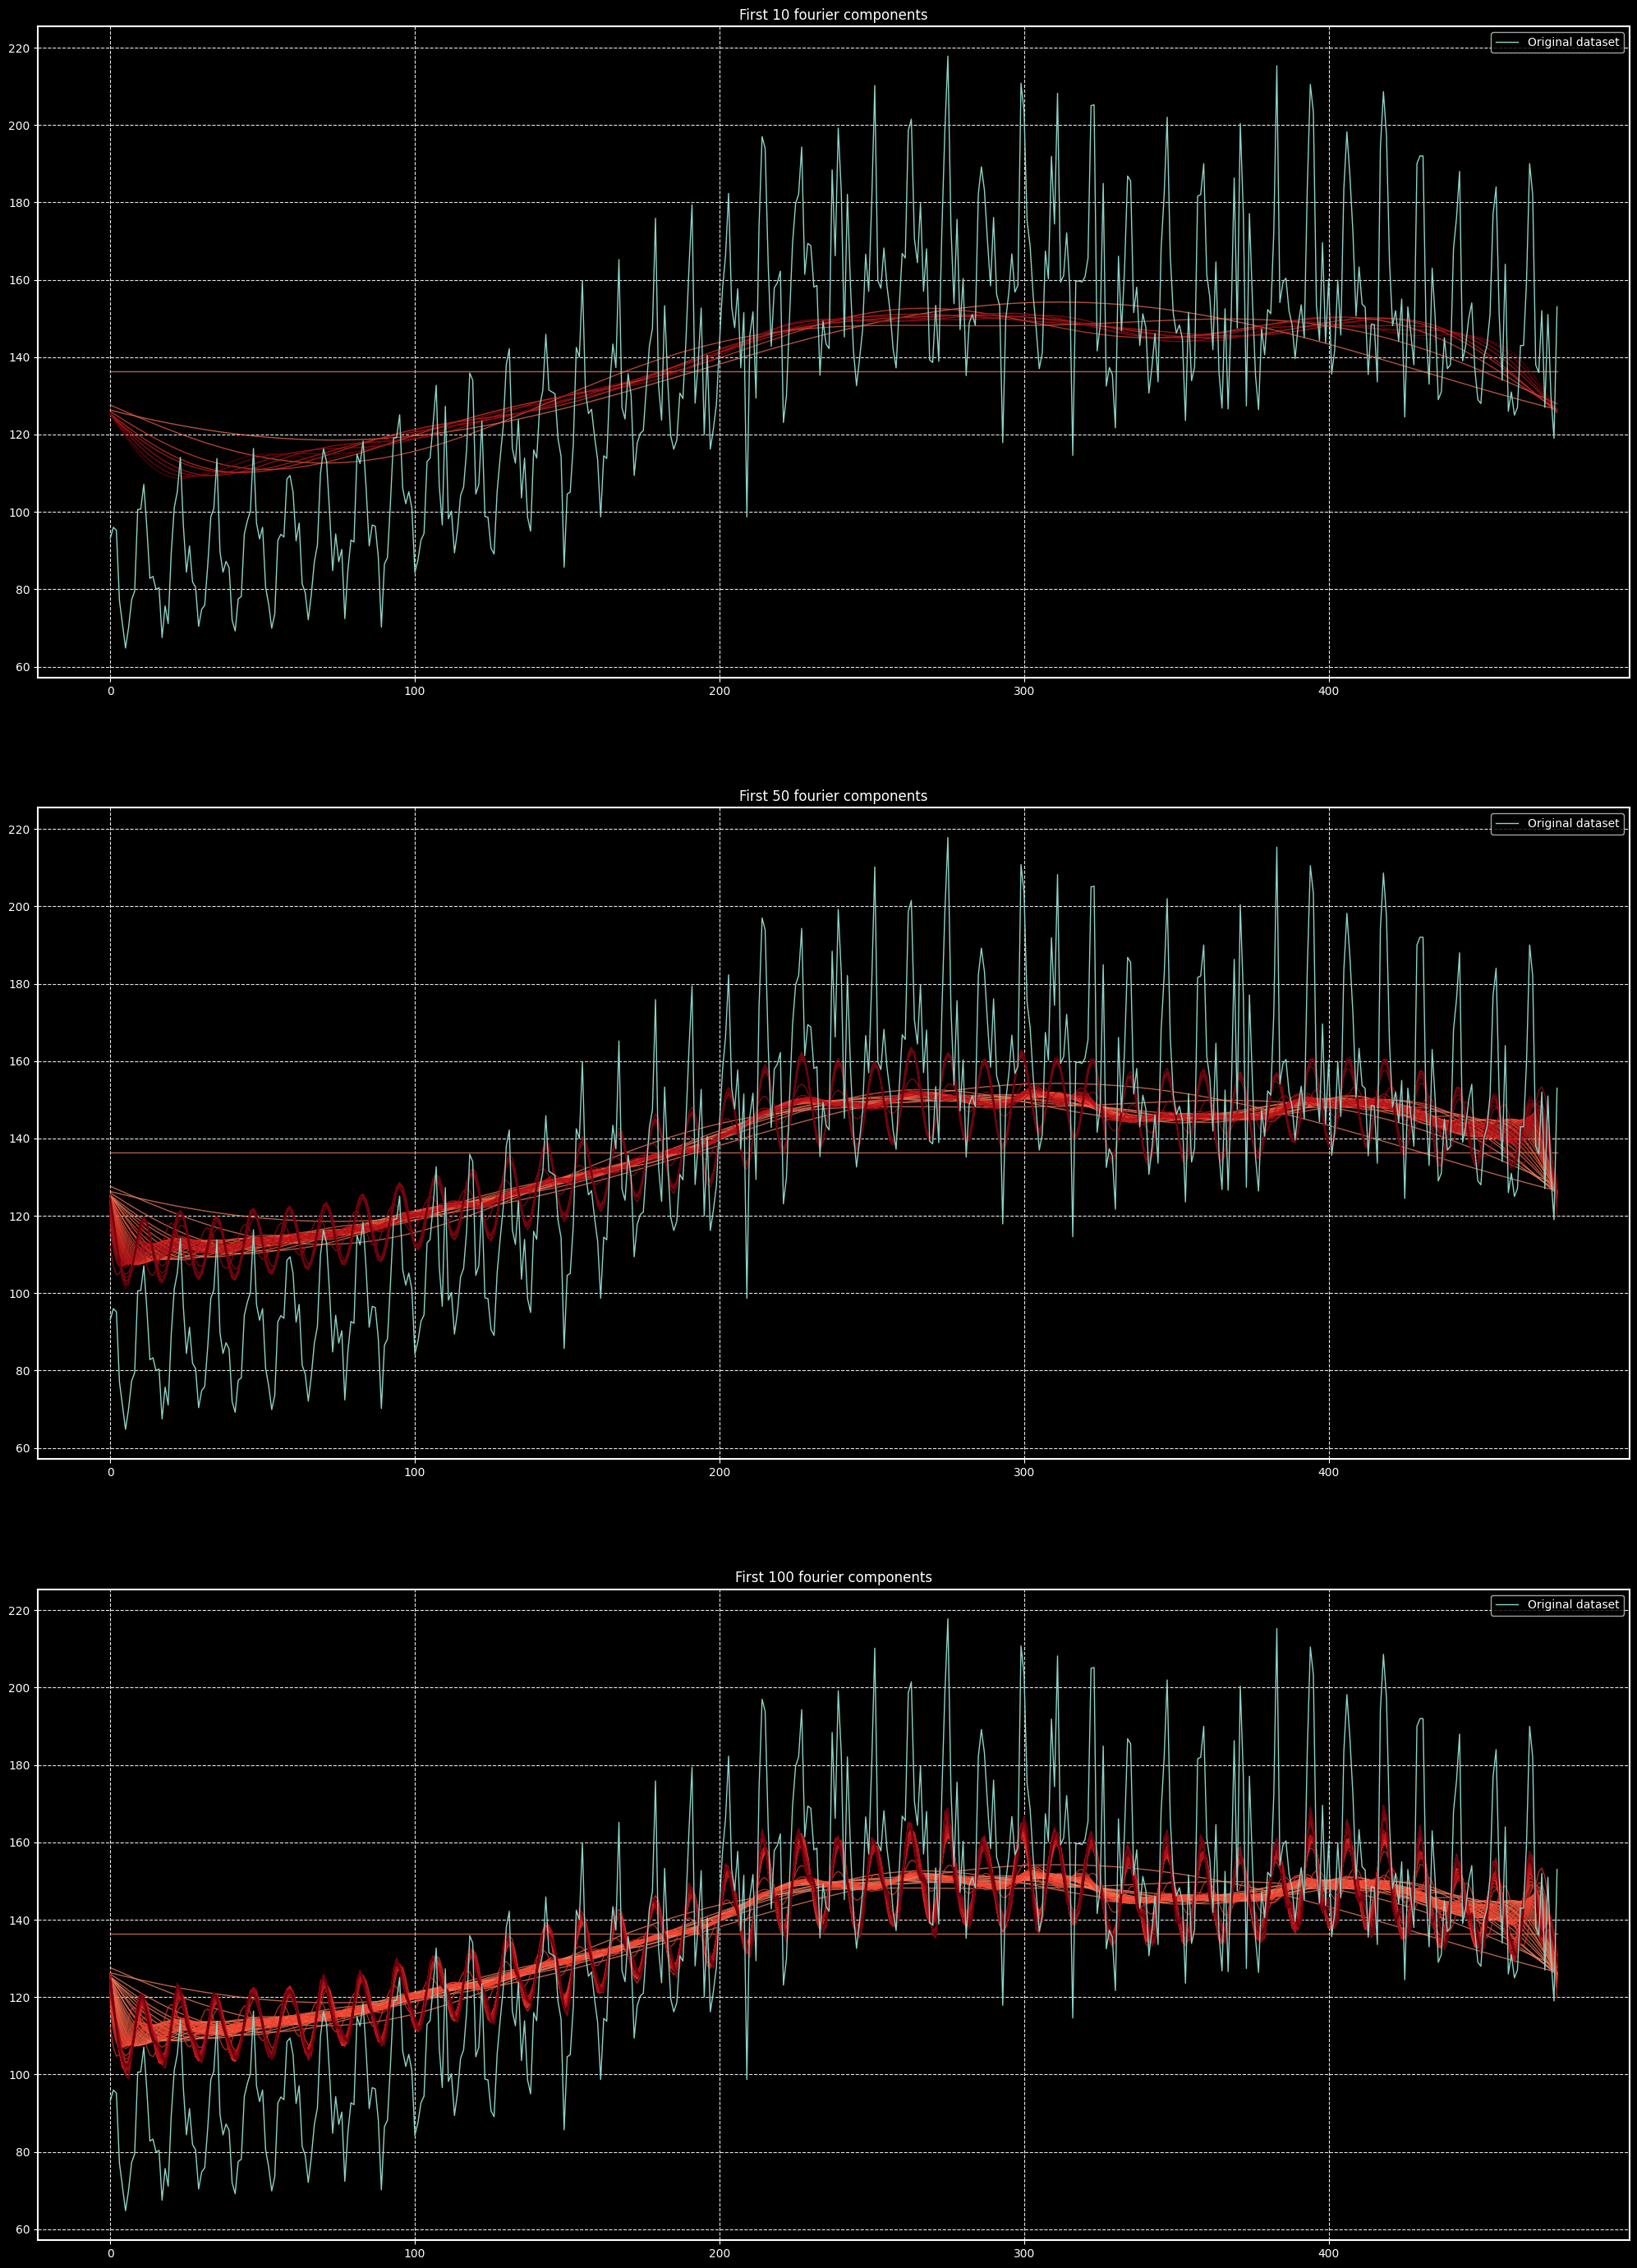

In [86]:
# Inspired from : https://dsp.stackexchange.com/a/49233/47462

y = smoothing_data.MBP.values
n = len(y)
x = np.linspace(start=0, stop=n-1, num=n)

fig, axes  = plt.subplots(3,1, figsize=(25,35))

COMPONENTS = [10, 50, 100]

for idx, c in enumerate(COMPONENTS):
    colors = np.linspace(start=100, stop=255, num=c)
    for i in range(c):
        Y = np.fft.fft(y)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
        axes[idx].plot(x, ifft.real, color=plt.cm.Reds(int(colors[i])), alpha=.70)
        smoothing_data['SmoothedData'] = ifft.real

    axes[idx].set_title("First {c} fourier components".format(c=c))
    axes[idx].plot(x,y, label="Original dataset")
    axes[idx].grid(linestyle='dashed')
    axes[idx].legend()


## Transformation & Adjustment Operations

We usually induldge in the adjustments and transformations because we want to make our time series data much more smoother and simpler, as simpler patterns usually make for much more accurate forecast.

- Calendar Adjustments
- Population Adjustments
- Inflation Adjustments
- Power Transforms
- Differencing
- Standardization
- Normalization


[Data transformations and forecasting models: what to use and when](https://people.duke.edu/~rnau/whatuse.htm)

In [ ]:
def get_transformed_plot(data, title):
    data=data.reset_index().copy()
    fig, axes = plt.subplots(2,1, figsize=(15,12))
    adjCol = [k for k in data.columns if 'Adjusted' in k or 'Transformed' in k][0]
    axes[0].plot(data.index, data.Actual)
    axes[1].plot(data.index, data[adjCol], color='lightgray')
    fig.suptitle(title, fontsize=20)
    plt.close()
    return fig

### Calendar Adjustment's
- Removes the variation in the dataset due to the intermittent variation in frequency related properties for ex :  different `number of days in a month`
- Makes time series much more simpler to forecast

In [ ]:
transformData1 = beerprod_data.copy()
transformData1.columns = ['Actual']

transformData2 = milkprod_data.copy()
transformData2.columns = ['Actual']


In [ ]:
transformData1['CalendarAdjusted'] = transformData1.Actual/transformData1.index.daysinmonth
transformData2['CalendarAdjusted'] = transformData2.Actual/transformData2.index.daysinmonth

In [ ]:
get_transformed_plot(transformData1[:100], 'Calendar Adjusted\nBeer Production')

In [ ]:
get_transformed_plot(transformData2, 'Calendar Adjuste\nMilk production')

### Population Adjustment's

- Adjustments accounting for the changes in population, for example Number of Schools in the Country. That time series will carry more meaning if it were to be in the terms of Per Capita

In [ ]:
popenergy_data.head()

In [ ]:
_=popenergy_data.iloc[:,1:].plot(title='Global Consumption of Various Categories of energy Sources')

In [ ]:
popenergy_data['Renewable_Energy_TWh'] = popenergy_data['Renewable_Energy_TWh']/popenergy_data['Population']
popenergy_data['NonRenewable_Energy_TWh'] = popenergy_data['NonRenewable_Energy_TWh']/popenergy_data['Population']
popenergy_data['Nuclear_Energy_TWh'] = popenergy_data['Nuclear_Energy_TWh']/popenergy_data['Population']
popenergy_data.head()

In [ ]:
_=popenergy_data.iloc[:,1:].plot(title='Global Consumption of Various Categories of energy Sources/Population')

### Inflation Adjustments

These adjustments are required when the working with financial data. Some object which costs @ $1,000.00 in 2020 might had costs @ $500.00 in 2005, but it doesnt neccesarily means that the `VALUE` of the object has been appreciated, as it might just be because of the inflation.

In [ ]:
housing_prices = houseprices_data.copy()
housing_prices.index = housing_prices.index.to_timestamp()
usa_cpi = usacpi_data[usacpi_data.index>='2008-03-01'].copy()
transformData3 = pd.merge(housing_prices, usa_cpi, left_index=True, right_index=True, how='inner')

In [ ]:
transformData3['Inflation_Adjusted_Price'] = transformData3['Price']/transformData3['CPI']
transformData3 = transformData3[transformData3.Region.isin(['Park Ridge'])]
transformData3 = transformData3.drop(['Region', 'CPI'], axis=1)
transformData3.rename(columns={'Price':'Actual'}, inplace=True)
transformData3.head()

In [ ]:
get_transformed_plot(transformData3, 'With and Without Inflation Adjustments of Housing Prices for Park Ridge')

### Mathematical Transformations

Usually these are the transformations that you'd want to do away with the porblem of `Heteroskedacity` in your dataset, i.e `Variance` of the data changing its scale over time..

These transformations include :-
- Natural Log -
\begin{equation}
    w_{t}=log(y_{t})
\end{equation}
- Square Root, Cube Root
\begin{equation}
    w_{t}=y_{t}^n
\end{equation}
- Box-Cox Transformation -
\begin{equation}
  w_{t}=\begin{cases}
    log(y_{t}), & \text{if $\lambda=0;$}\\
    (y_{t}^\lambda-1)/{\lambda}, & \text{otherwise}
  \end{cases}
\end{equation}



Back Transformations for :-
- Natural Log -
\begin{equation}
    F_{t}=log(f_{t})
\end{equation}
- Square Root, Cube Root
\begin{equation}
    F_{t}=f_{t}^\frac{1}{n}
\end{equation}
- Box-Cox Median Point Forecast-
\begin{equation}
  F_{t}=\begin{cases}
    exp(f_{t}), & \text{if $\lambda=0;$}\\
    (\lambda f_{t}+1)^\frac{1}{\lambda} , & \text{otherwise}
  \end{cases}
\end{equation}
- Box-Cox Mean Point Forecast-
\begin{equation}
  F_{t}=\begin{cases}
    exp(f_{t}) \left [1+\frac{\sigma_{h}^2}{2} \right ], & \text{if $\lambda=0;$}\\
    (\lambda f_{t}+1)^\frac{1}{\lambda} \left [1+\frac{\sigma_{h}^2(1-\lambda)}{2(\lambda f_{t} + 1)^2} \right ], & \text{otherwise}
  \end{cases}
\end{equation}


Where 

$Y_{t}$ : Original Time Series Data

$w_{t}$ : Transformed Time Series Data

$f_{t}$ : Forecasted Time Series Data with Transformations

$F_{t}$ : Back Transformed Time Series data to match the scales of $Y_{t}$

$\sigma_{h}$ : Standard Deviation in the Time series Forecasts.

NOTE : The additional terms in the `Box Cox` Transformations are because of the fact that the simple back transformation will result in the data being Median oriented of the Forecast Distribution, but if we want Mean oriented point forecasts, we will have to use these adjustments



In [ ]:
transformData4 = elecprod_data.copy()
transformData5 = antidiabetic_data.copy()

transformData4.columns = ['Actual']
transformData4.index.name = 'Date'

transformData5.columns = ['Actual']
transformData5.index.name = 'Date'

Try to use power transformations.. `np.sqrt`, `np.power(x,1/3)`

In [ ]:
transformData4['Transformed'] = np.log(transformData4.Actual)
get_transformed_plot(transformData4, 'Electricity Production With & Without Log Transformation')

In [ ]:
transformData5['Transformed'] = np.log(transformData5.Actual)
get_transformed_plot(transformData5, 'AntiDiabetic Sales With & Without Log Transformation')

<b>Box - Cox Transformation</b>

In [ ]:
from scipy.stats import boxcox

In [ ]:
transformData4['Transformed'], bc_lambda = boxcox(transformData4.Actual)
get_transformed_plot(transformData4,
                     r'Electricity Production Without & With BoxCox(λ={0}) Transformation'.format(round(bc_lambda,3)))


In [ ]:
transformData5['Transformed'], bc_lambda = boxcox(transformData5.Actual)
get_transformed_plot(transformData5,
                     r'Electricity Production Without & With BoxCox(λ={0}) Transformation'.format(round(bc_lambda,3)))



# Time Series Visualisations

- Time Series Plot -> TS Plot
- Seasonal Plot
- Box Plot
- Violin Plot
- ACF & PACF Plot - To be discussed in Next Notebook
- Distribution Plot
- Stacked TS Plot
- Scatter Plot
- Pair Plot

<b>Interesting Gallery : </b> [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)


In [87]:
beerprod_data = dataHolder.bucket['beer_prod'].data.copy()

## Time Series Plot - TS Plot

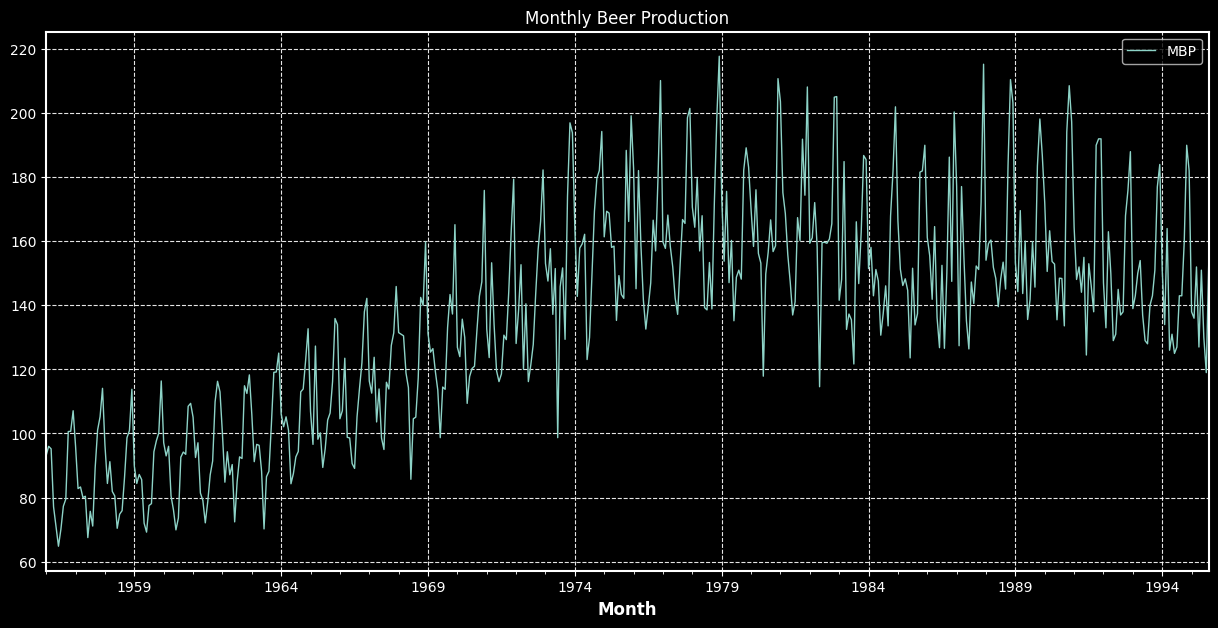

In [88]:
pltdata = beerprod_data.copy()
pltdata.columns = ['MBP']
_=pltdata.plot(title='Monthly Beer Production')

## Seasonal Plot

In [89]:
pltdata = beerprod_data.copy()
pltdata.columns = ['MBP']
pltdata['Month'] = pltdata.index.month_name()
pltdata['Year'] = pltdata.index.year
pltdata = pltdata.set_index(['Year', 'Month']).unstack().T
pltdata = pltdata.reset_index().drop(['level_0'], axis=1).set_index('Month')
pltdata.head()

Year       1956   1957   1958   1959   1960   1961   1962   1963   1964  \
Month                                                                     
April      77.1   80.0   81.9   85.6   80.5   81.4   87.1   96.3  101.0   
August     77.3   71.1   75.9   78.1   92.6   87.1   92.7   88.2   94.4   
December  107.1  114.1  113.8  116.4  109.4  113.0  118.3  125.1  132.7   
February   96.0   82.8   84.4   84.4   93.0   92.5   84.8   91.2  102.1   
January    93.2   95.9   96.3   89.8   97.1  105.1  100.0  106.0  106.1   

Year       1965  ...   1986   1987   1988   1989   1990   1991   1992   1993  \
Month            ...                                                           
April      98.2  ...  164.6  154.4  151.9  143.7  153.7  144.1  150.0  154.0   
August    104.2  ...  126.6  140.6  153.5  159.9  148.4  146.0  137.0  140.0   
December  134.0  ...  200.4  215.3  203.3  186.8  197.3  192.0  188.0  184.0   
February   96.6  ...  155.5  127.4  159.3  144.3  150.6  148.1  133.0  143.0   
January   106.9  ...  161.2  177.2  154.1  153.3  172.0  164.4  147.0  139.0   

Year       1994   1995  
Month                   
April     126.0  127.0  
August    143.0  153.0  
December  182.0    NaN  
February  134.0  136.0  
January   151.0  138.0  

[5 rows x 40 columns]

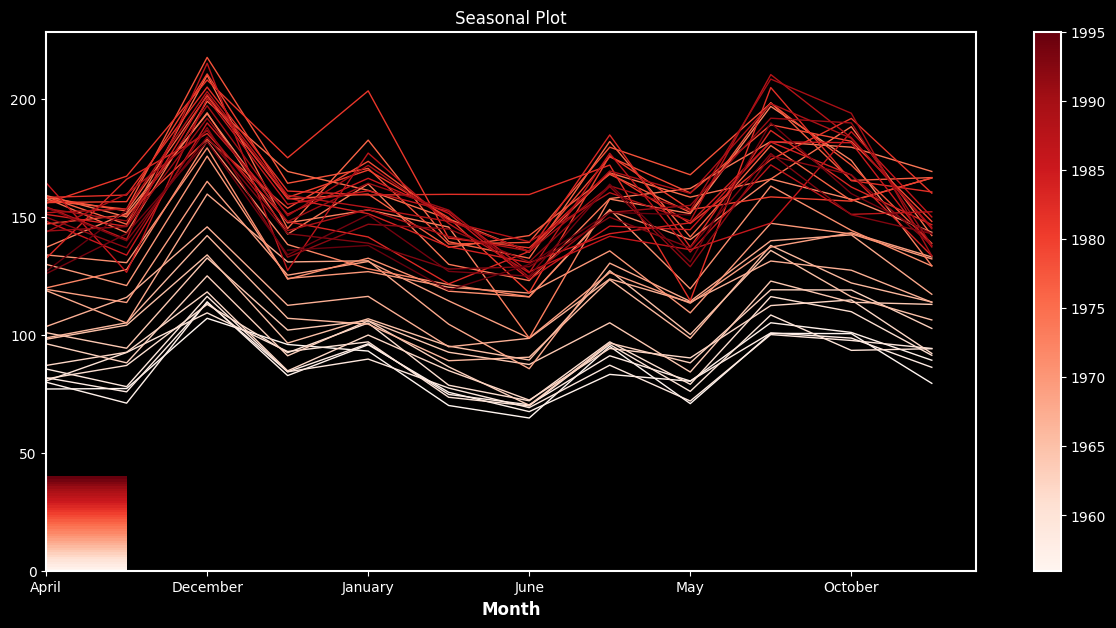

In [90]:
fig, axes = plt.subplots()
plot=pltdata.plot(title='Seasonal Plot', cmap='Reds', ax=axes, legend=None)
plot = axes.pcolor(pd.DataFrame(pltdata.columns.astype(int)), cmap='Reds')
_=fig.colorbar(plot)

## Box Plot

In [91]:
pltdata = beerprod_data.copy()
pltdata.columns = ['MBP']
pltdata['Month'] = pltdata.index.month_name()
pltdata['Year'] = pltdata.index.year
pltdata.head()

MBP     Month  Year
Month                           
1956-01-01  93.2   January  1956
1956-02-01  96.0  February  1956
1956-03-01  95.2     March  1956
1956-04-01  77.1     April  1956
1956-05-01  70.9       May  1956

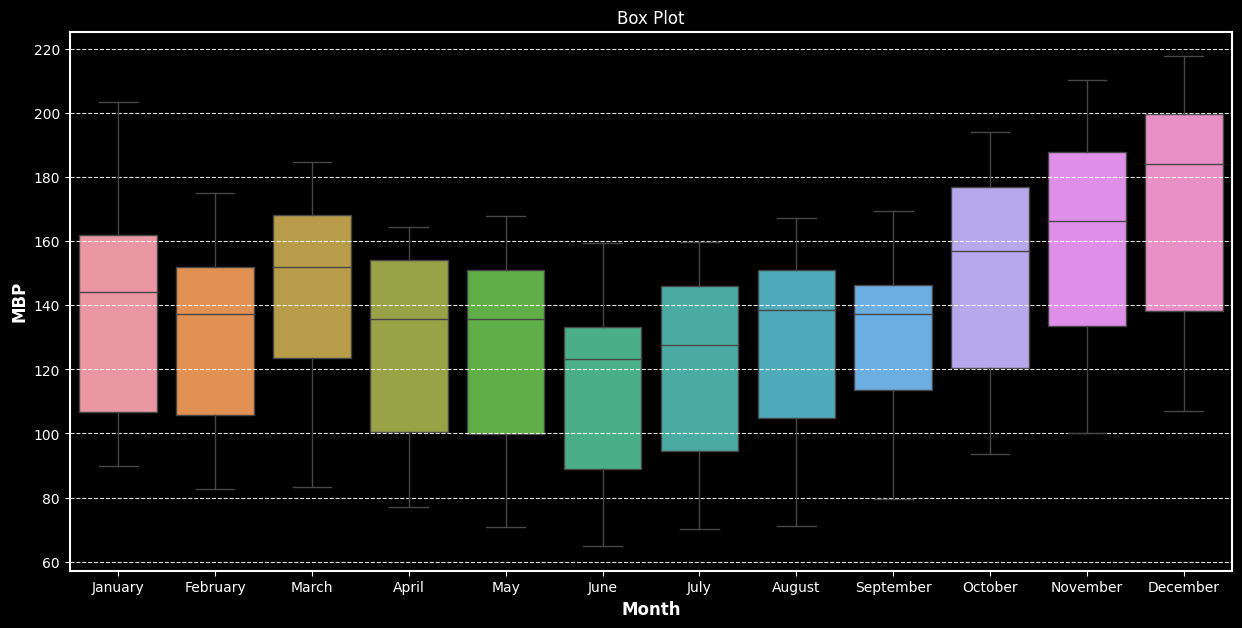

In [92]:
_=sns.boxplot(x='Month', y='MBP', data=pltdata)
_=plt.title('Box Plot')

## Violin Plot

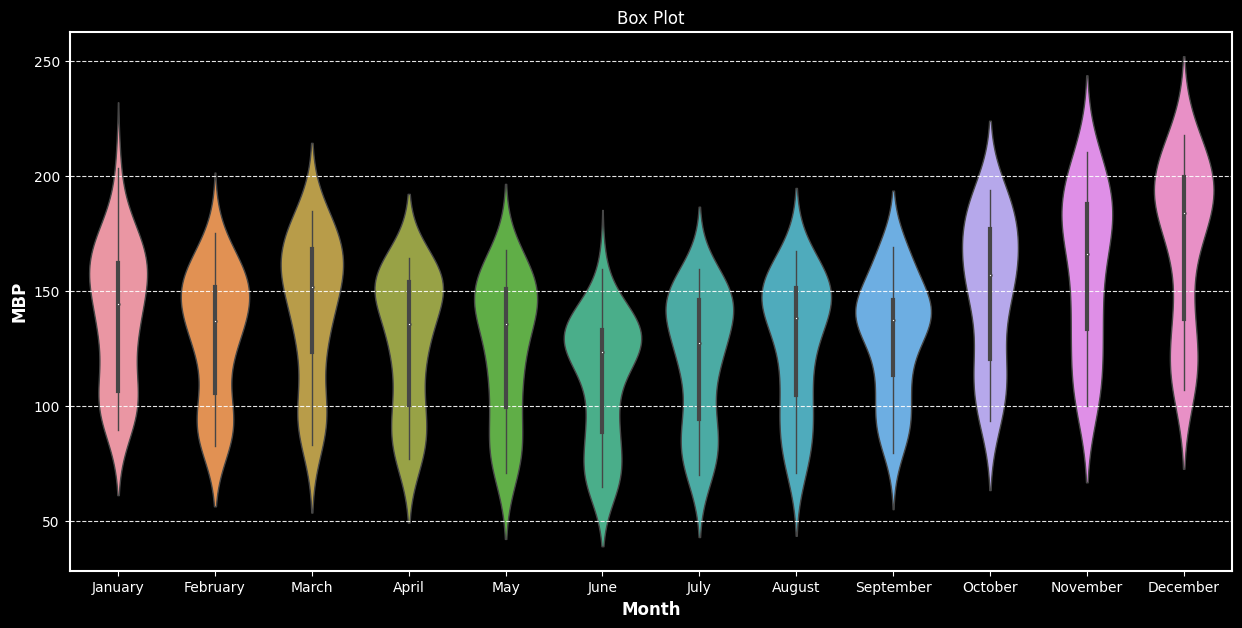

In [93]:
_=sns.violinplot(x='Month', y='MBP', data=pltdata)
_=plt.title('Box Plot')

## Distribution Plot

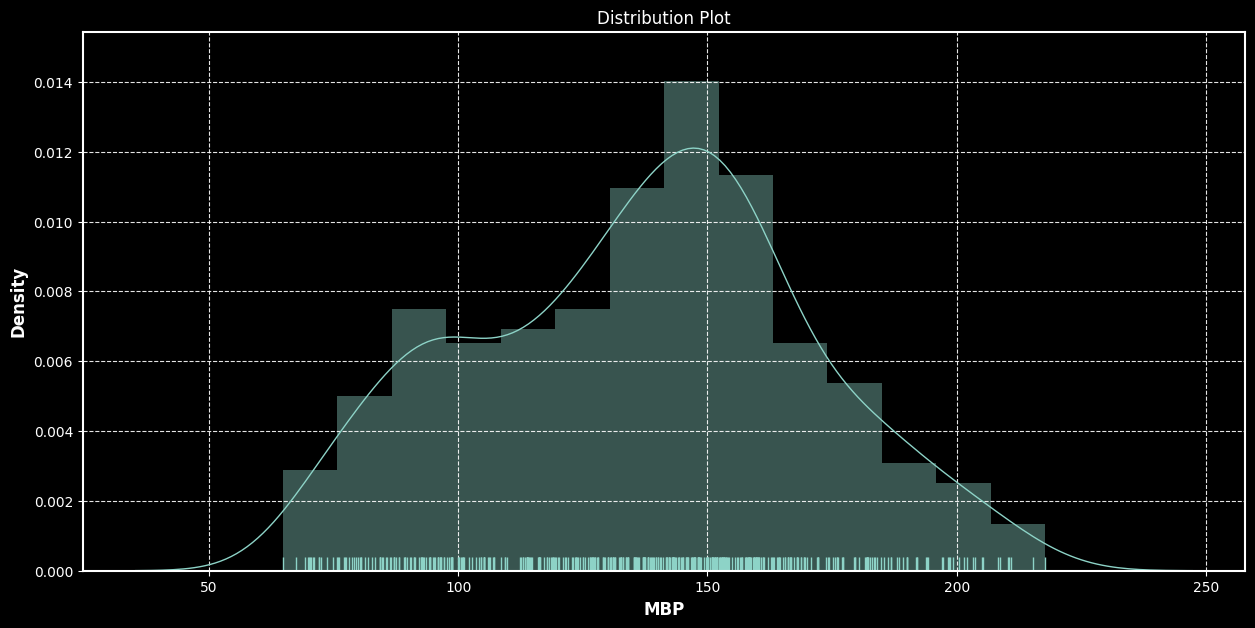

In [94]:
_=sns.distplot(pltdata.MBP, rug=True)
_=plt.title('Distribution Plot')

## Stacked TS Plots

In [97]:
pltdata = dataHolder.bucket['visitor_20r'].data.copy()
regions = pltdata.Regions.unique()[:5]

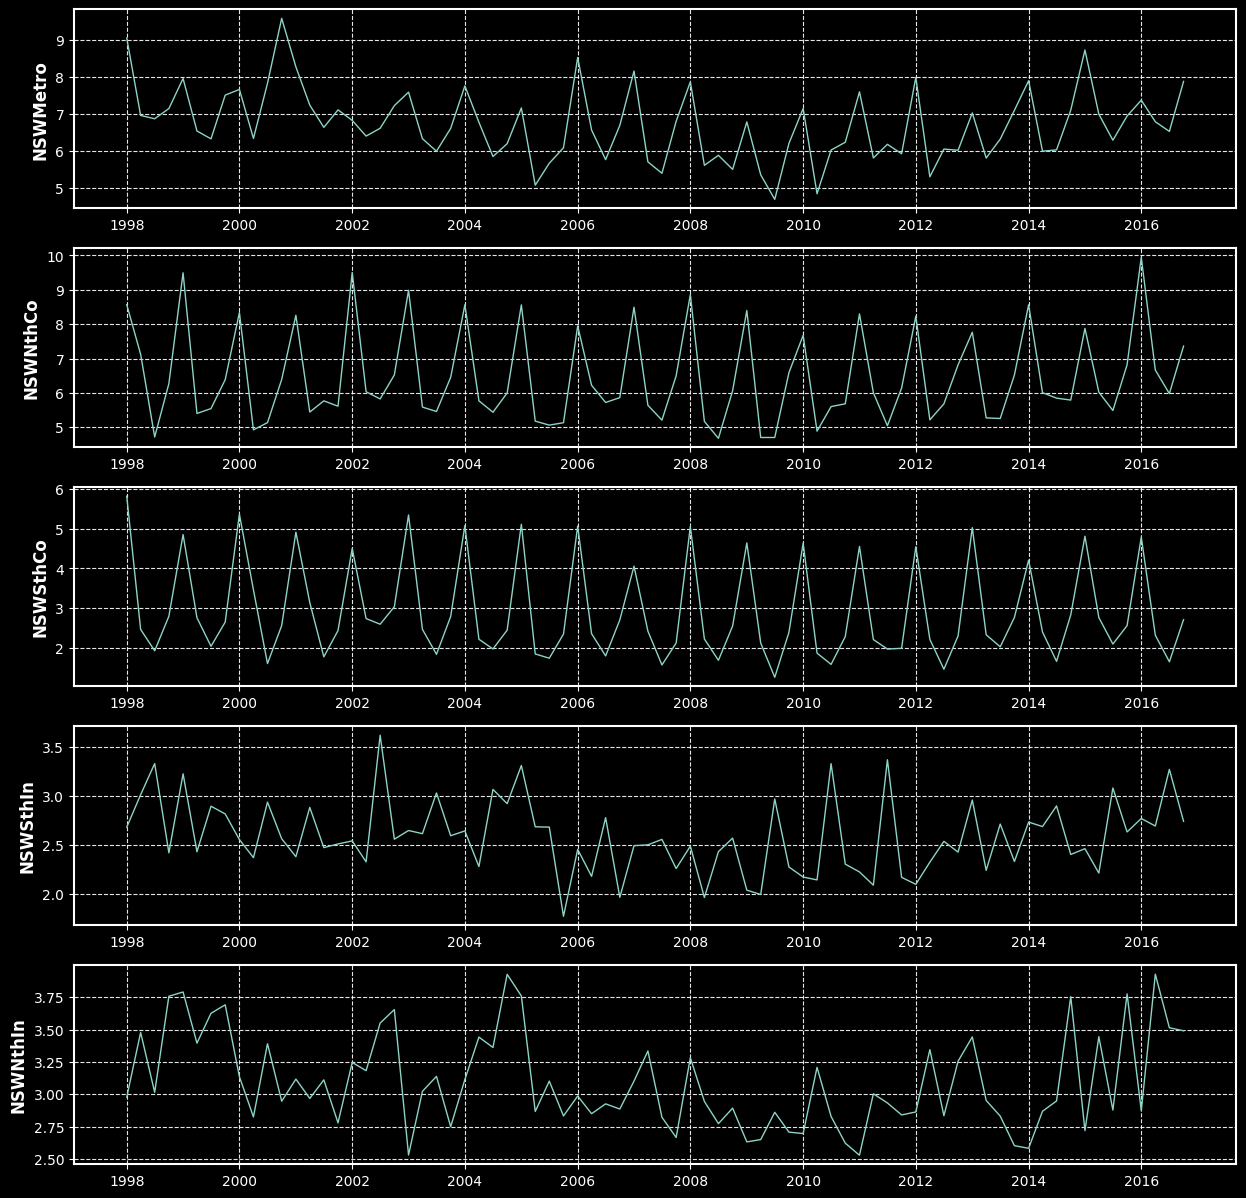

In [98]:
fig, axes = plt.subplots(len(regions), 1, figsize=(15,15))

for eregion, eax in zip(regions, axes.flatten()):
    _data = pltdata[pltdata.Regions==eregion].copy().drop('Regions', axis=1)
    eax.plot(_data)
    eax.set_ylabel(eregion)
    

## Scatter Plot

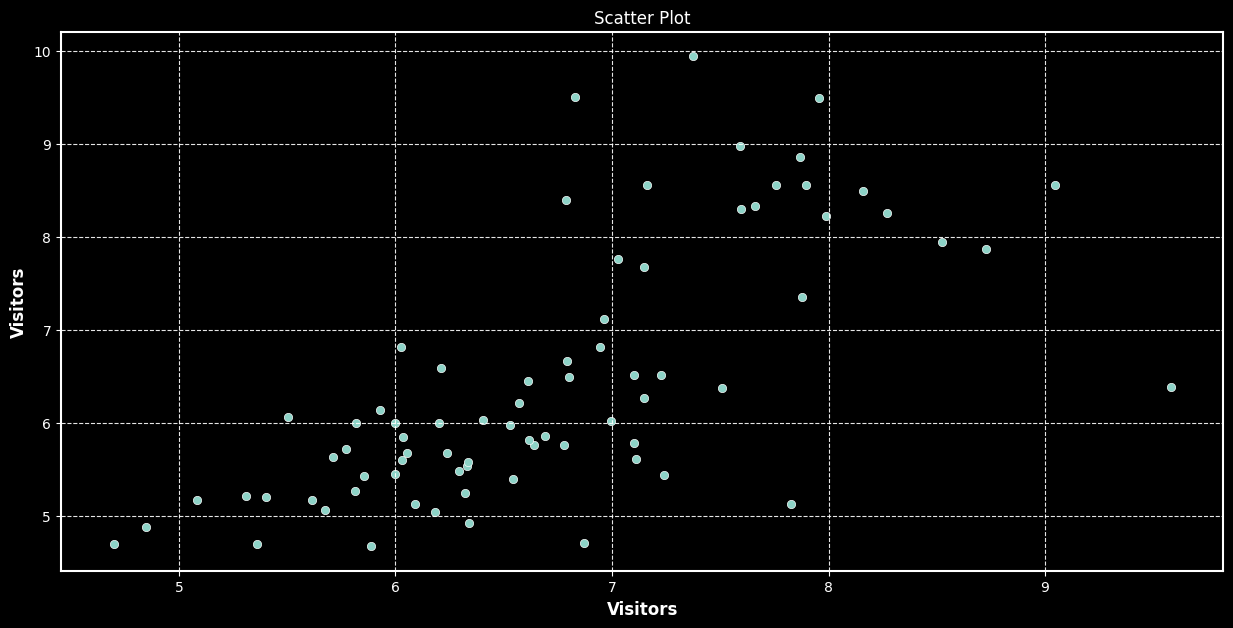

In [99]:
xdata = pltdata[pltdata.Regions=='NSWMetro'].Visitors
ydata = pltdata[pltdata.Regions=='NSWNthCo'].Visitors

_=sns.scatterplot(xdata, ydata, x_jitter=True)
_=plt.title('Scatter Plot')

## Joint Plot

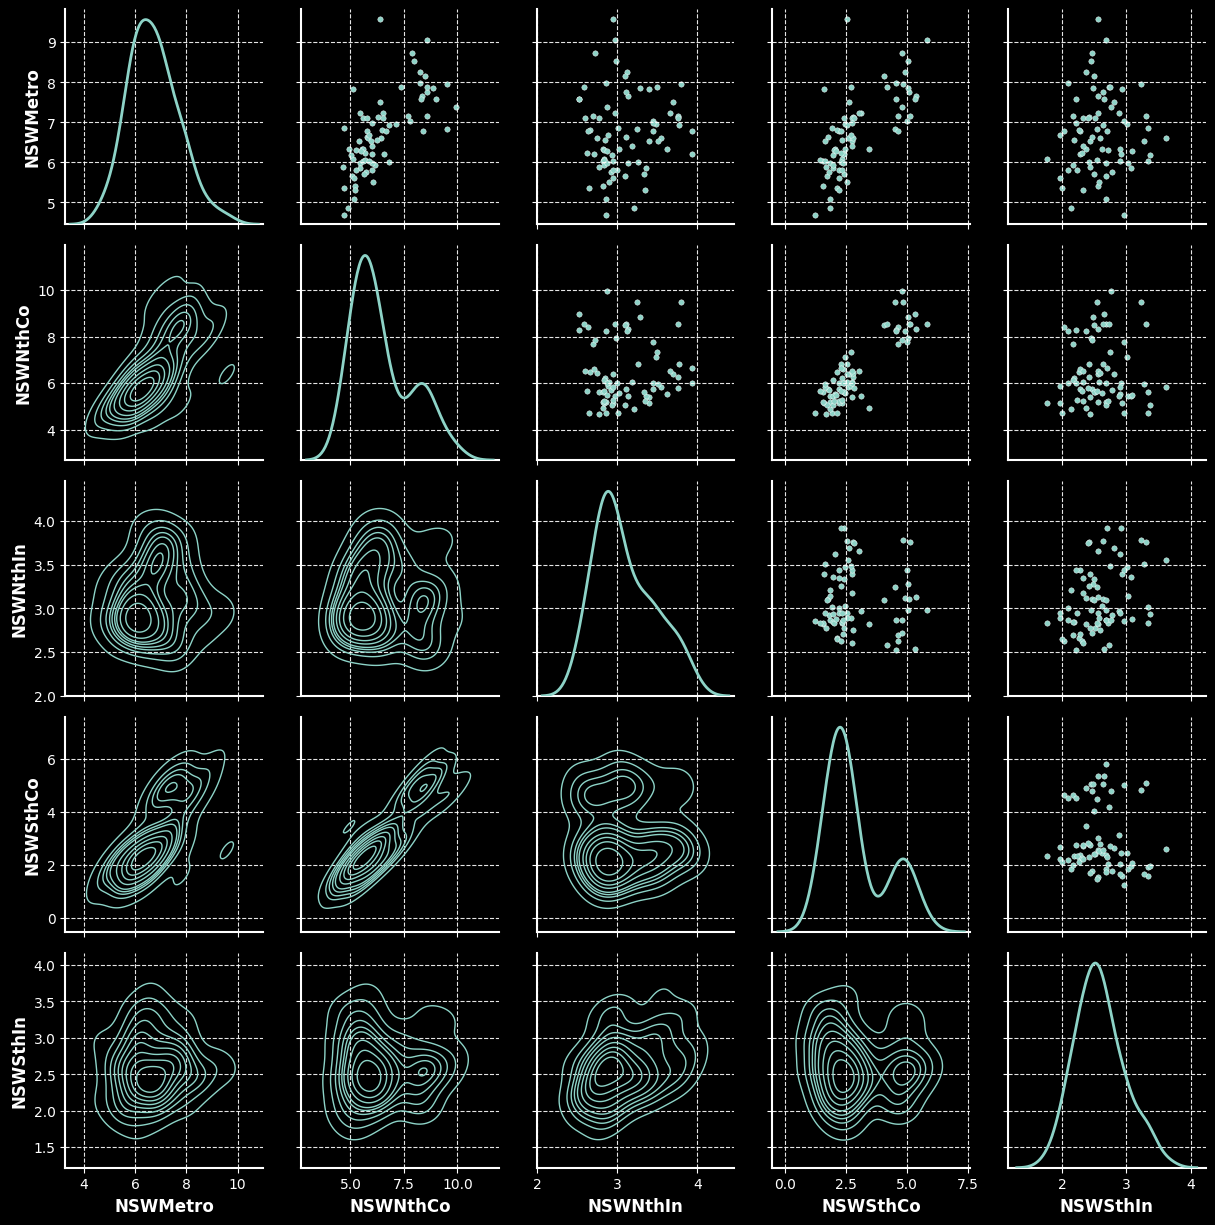

In [102]:
pltdata=pltdata.reset_index().pivot('Quarter','Regions','Visitors').iloc[:,:5]

g = sns.PairGrid(pltdata, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
_=g.map_diag(sns.kdeplot, lw=2)

# Time Series Decomposition

Time Series Components : 

- <b>Trend</b> : It is the component which reflect relatively longer period of `increase` or `decrease` in the data.
- <b>Seasonality</b> : Seasonality is the component which reflects the effect of `Calendar` attributed in the data, i.e effect of Weekdays, Months, Day of the Week. etc. This pattern usually adheres to regular frequency.
- <b>Cyclicity</b> : Cyclicity is probably the harder of all the components to figure out, which generally is attributed to the fact that it is not that periodic. It is generally a longer term seasonality pattern.
- <b>Noise or Residual</b> : Once the above three components have been identified, whatever is left is `Noise`.

Decomposition Methods:

- Classical Decomposition, Additive : 
\begin{equation}
  Y_{t} = T_{t} + S_{t} + R_{t}
\end{equation}
- Classical Decomposition, Multiplicative : 
\begin{equation}
  Y_{t} = T_{t}*S_{t}*R_{t}
\end{equation}
    
- STL : [StatsModel - Decomposition](https://www.statsmodels.org/stable/examples/notebooks/generated/stl_decomposition.html)

- X11 : [The X-11 Method](http://www.christophsax.com/x13story/x11.pdf)

- SEATS :  [The X-13 Method](http://course1.winona.edu/bdeppa/FIN%20335/Handouts/Time_Series_Decomposition.html)

Where

$Y_{t}$ : Actual Time Series

$T_{t}$ : Trend Component of the Time Series;
$S_{t}$ : Seasonal Component of the Time Series;
$R_{t}$ : Residual Component

    
[What is the difference between Period Cycle and Seasonality](https://stats.stackexchange.com/questions/234492/what-is-the-difference-between-period-cycle-and-seasonality)

[Cyclic & Seasonal Time Series - Rob.J.Hyndman](https://robjhyndman.com/hyndsight/cyclicts/)

<b>Creating a Random Dataset</b>

In [103]:

def get_decompose_plot(data):
    data = data.copy()
    data.index.name = ''
    grid = plt.GridSpec(4, 2, wspace=0.1, hspace=0.5)
    series_ax = plt.subplot(grid[0:2, :])
    series_ax.set_title('Time Series')
    
#     ts_trnsfrm, blambda = boxcox(data['ts'])
#     data['ts'] = pd.Series(ts_trnsfrm, name='ts', index=data['ts'].index)
    data['ts'].plot(ax=series_ax)

    trend_ax = plt.subplot(grid[2, 0])
    trend_ax.set_title('Trend Series')
    data['Trend'].plot(ax=trend_ax)

    cycl_ax = plt.subplot(grid[2, 1])
    cycl_ax.set_title('Cyclic Component')
    data['Cyclicity'].plot(ax=cycl_ax)

    seas_ax = plt.subplot(grid[3, 0])
    seas_ax.set_title('Seasonal Component')
    data['Seasonality'].plot(ax=seas_ax)

    resid_ax = plt.subplot(grid[3, 1])
    resid_ax.set_title('Residuals/Noise')
    data['Residual'].plot(ax=resid_ax)
        
    return grid


def generat_randomtsdata(tstart = '1990-01-01', tend = '2020-01-01', plot=False):
    rows = (pd.to_datetime(tend)-pd.to_datetime(tstart)).days+1
    simData = pd.DataFrame(columns=['Trend',  'Cyclicity', 'Seasonality', 'Residual'],
                           index=pd.date_range(tstart, tend, freq='1D'))
    
    _days=np.arange(rows)

    # Trend Componet
    simData['Trend'] = 2*np.arange(rows)/rows
    # Cyclicity Componet
    simData['Cyclicity'] = 0.3*np.sin(3*_days/rows * 2 * np.pi)
    # Seasonality - For Additive
    simData['Seasonality'] = 0.3*np.sin(_days/365 * 2 * np.pi)
    # Seasonality - For Multiplicative
    simData['Seasonality'] = 0.3*(_days/rows)*np.sin(_days/365 * 2 * np.pi)
    # Residual
    simData['Residual'] = np.random.random(rows)/10
    # Time Series
    simData['ts'] = simData.sum(axis=1)
    
    if plot : get_decompose_plot(simData)
    
    return simData


<b>Analysing the Components</b>

Trend  Cyclicity   Seasonality  Residual        ts
1990-01-01  0.000000   0.000000  0.000000e+00  0.033757  0.033757
1990-01-02  0.000183   0.000516  4.712545e-07  0.042203  0.042902
1990-01-03  0.000365   0.001032  1.884739e-06  0.008167  0.009566
1990-01-04  0.000548   0.001548  4.239615e-06  0.042810  0.044910
1990-01-05  0.000730   0.002064  7.534487e-06  0.069576  0.072378
...              ...        ...           ...       ...       ...
2019-12-28  1.999087  -0.002580  1.547883e-02  0.083783  2.095769
2019-12-29  1.999270  -0.002064  2.063319e-02  0.053423  2.071262
2019-12-30  1.999452  -0.001548  2.578238e-02  0.074653  2.098340
2019-12-31  1.999635  -0.001032  3.092486e-02  0.096686  2.126214
2020-01-01  1.999817  -0.000516  3.605912e-02  0.052941  2.088302

[10958 rows x 5 columns]

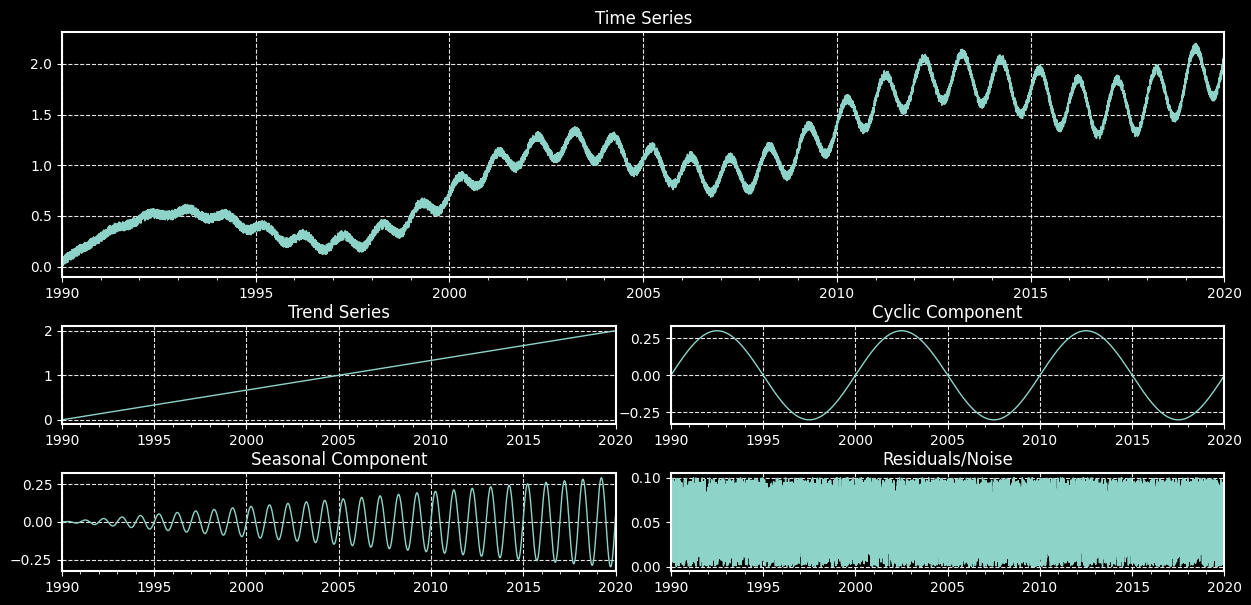

In [104]:
sim_data = generat_randomtsdata(plot=True)
sim_data

<b>Classical Decomposition - Additive</b>

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose

antidiabetic_data = dataHolder.bucket['anti_diabetic'].data.copy()
milkprod_data = dataHolder.bucket['mprod_data'].data.copy()
beerprod_data = dataHolder.bucket['beer_prod'].data.copy()

Interesting Note, if you apply log to the Multiplicative equation it simply becomes the Classical Additive Decomposition.

In [109]:
decompose_obj = seasonal_decompose(milkprod_data.MilkProduction, period=12, extrapolate_trend=True)

decomposeData = pd.DataFrame(columns=['Trend', 'Cyclicity', 'Seasonality', 'Residual', 'ts'],
                             index=milkprod_data.index)
decomposeData['Trend'] = decompose_obj.trend
decomposeData['Seasonality'] = decompose_obj.seasonal
decomposeData['Residual'] = decompose_obj.resid
decomposeData['ts'] = milkprod_data.MilkProduction

GridSpec(4, 2)

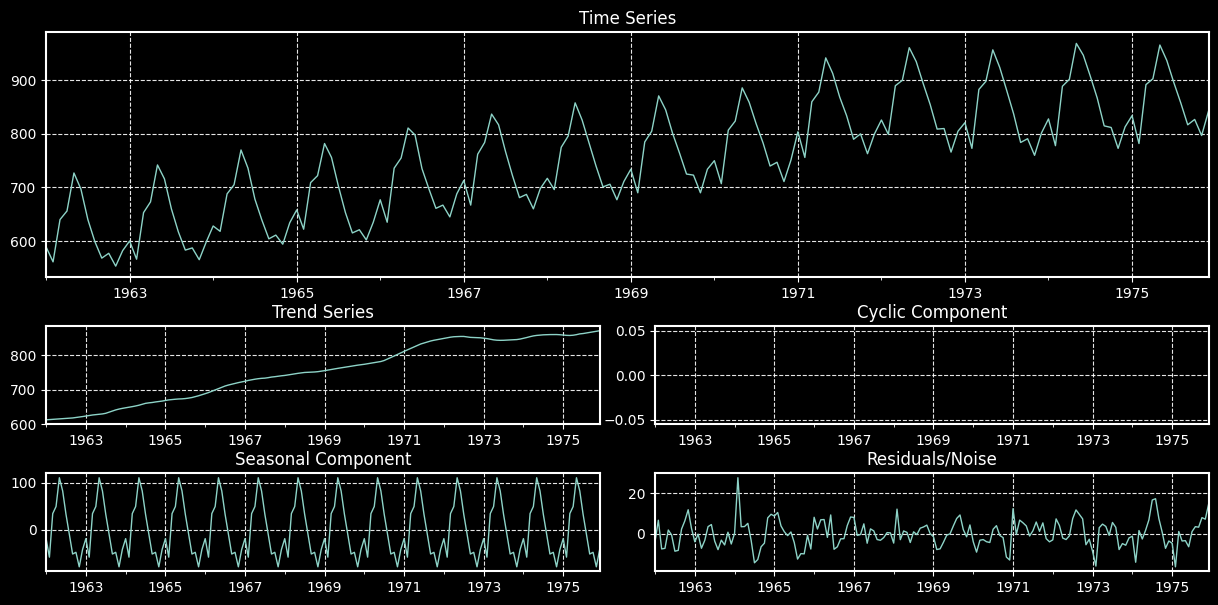

In [110]:
get_decompose_plot(decomposeData)

<b>Classical Decomposition - Multiplicative</b>

Multiplicative Decompose doesnt work on Negative or NaN data... Can you think as to why?

In [112]:
decompose_obj = seasonal_decompose(beerprod_data.MBP, period=12,
                                   extrapolate_trend=True, model='multiplicative')

decomposeData = pd.DataFrame(columns=['Trend', 'Cyclicity', 'Seasonality', 'Residual', 'ts'],
                             index=beerprod_data.index)
decomposeData['Trend'] = decompose_obj.trend
decomposeData['Seasonality'] = decompose_obj.seasonal
decomposeData['Residual'] = decompose_obj.resid
decomposeData['ts'] = beerprod_data.MBP

GridSpec(4, 2)

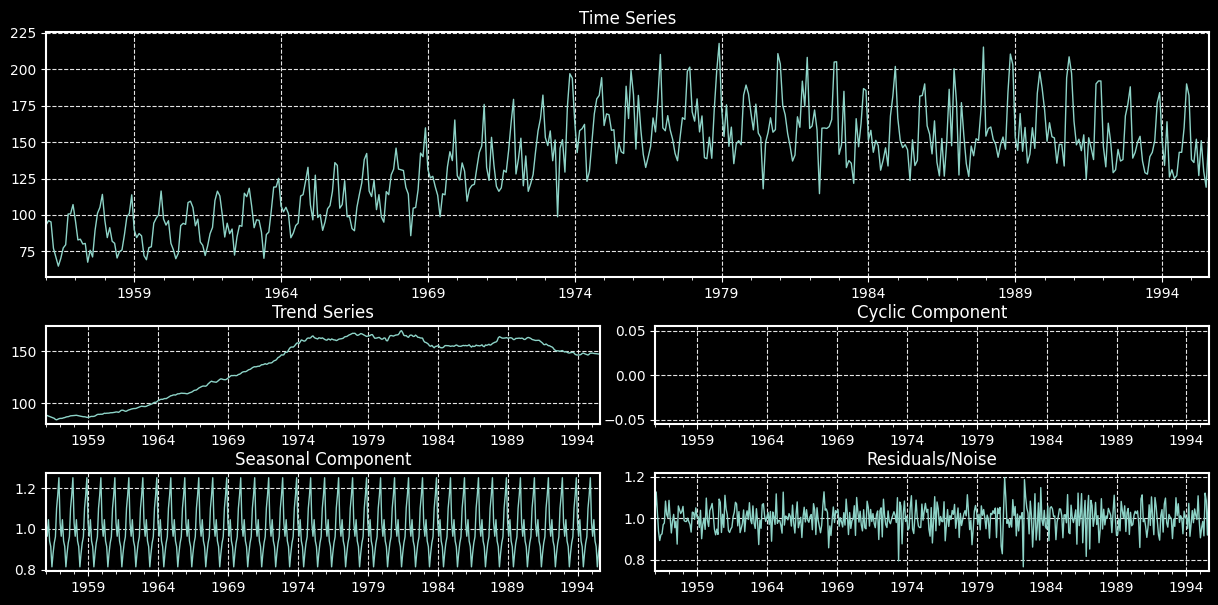

In [113]:
get_decompose_plot(decomposeData)

<b>STL Decomposition</b>

Time Series uses `LOESS` - Locally Estimated Scatterplot Smoothing


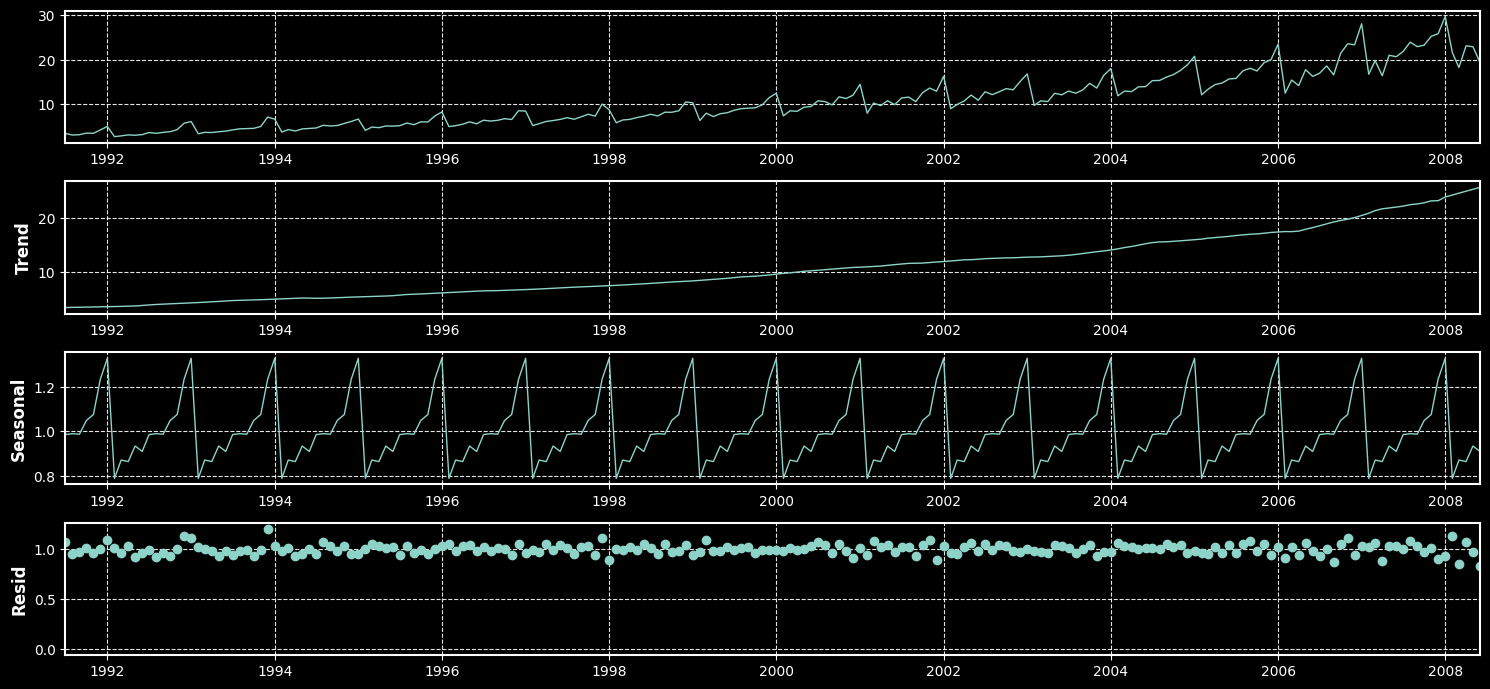

In [114]:
decompose_obj = seasonal_decompose(antidiabetic_data, period=12,
                                   extrapolate_trend=True, model='multiplicative')

decomposeData = pd.DataFrame(columns=['Trend', 'Cyclicity', 'Seasonality', 'Residual', 'ts'],
                             index=antidiabetic_data.index)
decomposeData['Trend'] = decompose_obj.trend
decomposeData['Seasonality'] = decompose_obj.seasonal
decomposeData['Residual'] = decompose_obj.resid
decomposeData['ts'] = antidiabetic_data.value

fig=decompose_obj.plot()

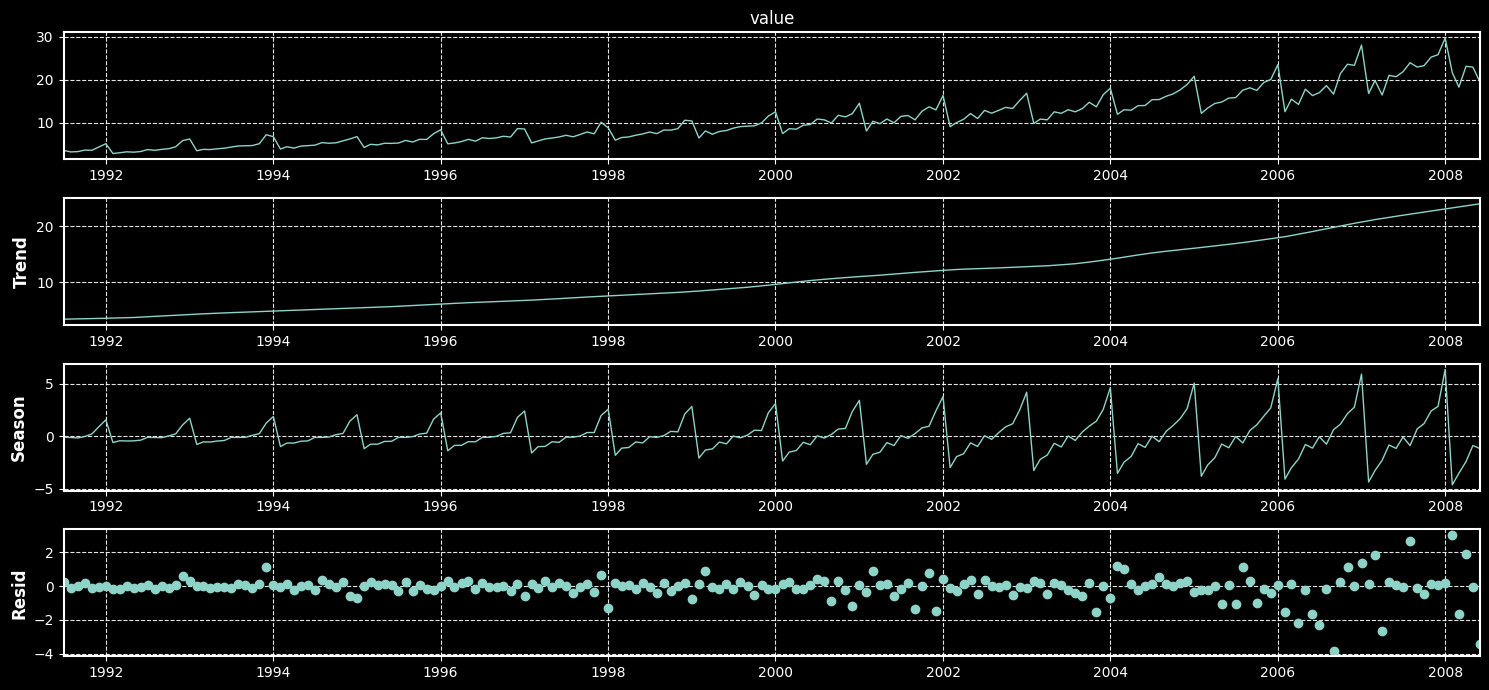

In [115]:
from statsmodels.tsa.seasonal import STL
stl = STL(antidiabetic_data.value, seasonal=13, robust=True)
res = stl.fit()
fig = res.plot()

# Random Testing Space

In [116]:
dataHolder.dataDf

Handle         Short Description
0           airp_data            Air Passengers
1          mprod_data           Milk Production
2          brit_stock     Britannia Stock Price
3           india_cpi                 India CPI
4           beer_prod           Beer Production
5         house_price            Housing Prices
6   airp_data_missing  Air Passengers - Missing
7     housing_missing    Housing Data - Missing
8            pop_ener       Population & Energy
9             usa_cpi                   USA-CPI
10      anti_diabetic    AntiDiabetic Drug Sale
11       aus_elecprod    Electricity Production
12        visitor_20r    Visitors to 20 Regions